In [1]:
import pickle
import tqdm
import glob
import os
import itertools
import string

import pandas as pd
import numpy as np
import scipy.stats

import igraph
import palettable

#visualization
import palettable
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.colors as matp
import seaborn as sns

# %matplotlib inline
#image libraries
import PIL.Image

# you can install ordpy by running "pip install ordpy" on a terminal.
from ordpy import ordinal_network, global_node_entropy #functions also available four cells below 

#extend notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:99.5% !important;} </style>"))

In [2]:
#Statistical Learning
#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier

#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, r2_score
from sklearn.metrics import confusion_matrix

#dimensionality reduction
from sklearn.decomposition import PCA

In [3]:
#parallel computing
import dask.delayed
from dask import compute
from dask.diagnostics import ProgressBar

In [4]:
def stdfigsize(scale=1, nrows=1, ncols=1, ratio=1.3):
    """
    Returns a tuple to be used as figure size.

    Parameters
    ----------
    returns (7*ratio*scale*nrows, 7.*scale*ncols)
    By default: ratio=1.3
    ----------
    Returns (7*ratio*scale*nrows, 7.*scale*ncols).
    """

    return((7*ratio*scale*ncols, 7.*scale*nrows)) #Appropriate size for images.


#Figure style definitions.
sns.set_style("white")
sns.set_style({"xtick.direction": "out", "ytick.direction": "out"})

rcparams = {
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica'],
    'axes.labelsize': 28,
    'axes.titlesize': 28,
    'legend.fontsize': 20,
    'ytick.right': 'off',
    'xtick.top': 'off',
    'ytick.left': 'on',
    'xtick.bottom': 'on',
    'xtick.labelsize': '25',
    'ytick.labelsize': '25',
    'axes.linewidth': 2.5,
    'xtick.major.width': 1.8,
    'xtick.minor.width': 1.8,
    'xtick.major.size': 14,
    'xtick.minor.size': 7,
    'xtick.major.pad': 10,
    'xtick.minor.pad': 10,
    'ytick.major.width': 1.8,
    'ytick.minor.width': 1.8,
    'ytick.major.size': 14,
    'ytick.minor.size': 7,
    'ytick.major.pad': 10,
    'ytick.minor.pad': 10,
    'axes.labelpad': 15,
    'axes.titlepad': 15,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'figure.figsize': stdfigsize(),
    'lines.linewidth': 3
}
mpl.rcParams.update(rcparams)

# Functions' definitions

In [5]:
# def global_node_entropy(data, dx=3, dy=1, taux=1, tauy=1, overlapping=True, connections="all", tie_precision=None):
#     """
#     Calculates global node entropy\\ [#pessa2019]_\\ :sup:`,`\\ [#McCullough]_ for an
#     ordinal network obtained from data. (Assumes directed and weighted edges).

#     Parameters
#     ----------
#     data : array, return of :func:`ordpy.ordinal_network`
#            Array object in the format :math:`[x_{1}, x_{2}, x_{3}, \\ldots ,x_{n}]` 
#            or  :math:`[[x_{11}, x_{12}, x_{13}, \\ldots, x_{1m}],
#            \\ldots, [x_{n1}, x_{n2}, x_{n3}, \\ldots, x_{nm}]]` 
#            or an ordinal network returned by :func:`ordpy.ordinal_network`\\ [*]_.
#     dx : int
#          Embedding dimension (horizontal axis) (default: 3).
#     dy : int
#          Embedding dimension (vertical axis); it must be 1 for time series 
#          (default: 1).
#     taux : int
#            Embedding delay (horizontal axis) (default: 1).
#     tauy : int
#            Embedding delay (vertical axis) (default: 1).
#     overlapping : boolean
#                   If `True`, **data** is partitioned into overlapping sliding 
#                   windows (default: `True`). If `False`, adjacent partitions are
#                   non-overlapping.
#     connections : str
#                   The ordinal network is constructed using `'all'` permutation
#                   successions in a symbolic sequence or only `'horizontal'` or 
#                   `'vertical'` successions. Parameter only valid for image data
#                   (default: `'all'`). 
#     tie_precision : int
#                     If not `None`, **data** is rounded with `tie_precision`
#                     number of decimals (default: `None`).

#     Returns
#     -------
#      : float
#        Value of global node entropy.

#     Notes
#     -----
#     .. [*] In case **data** is an ordinal network returned by 
#            :func:`ordpy.ordinal_network`, the parameters of 
#            :func:`ordpy.global_node_entropy` are infered from the network.

#     Examples
#     --------
#     >>> global_node_entropy([1,2,3,4,5,6,7,8,9], dx=2)
#     0.0
#     >>>
#     >>> global_node_entropy(ordinal_network([1,2,3,4,5,6,7,8,9], dx=2))
#     0.0
#     >>>
#     >>> global_node_entropy(np.random.uniform(size=100000), dx=3)
#     1.4988332319747597
#     >>>
#     >>> global_node_entropy(random_ordinal_network(dx=3))
#     1.5
#     >>>
#     >>> global_node_entropy([[1,2,1,4],[8,3,4,5],[6,7,5,6]], dx=2, dy=2, connections='horizontal')
#     0.25
#     >>>
#     >>> global_node_entropy([[1,2,1,4],[8,3,4,5],[6,7,5,6]], dx=2, dy=2, connections='vertical')
#     0.0
#     """
#     if len(data)==3 and type(data[0][0])==np.str_:
#         nodes, links, weights = data
#     else:
#         #assumes 'normalized==True' and 'directed==True'.
#         nodes, links, weights = ordinal_network(data, dx, dy, taux, tauy, True, 
#                                                 overlapping, True, connections, tie_precision=tie_precision)

#     links_source = links.transpose()[0]
#     links_target = links.transpose()[1]
#     h_gn  = 0
#     for node in nodes:
#         args           = np.argwhere(links_source==node).flatten()
#         renorm_weights = weights[args]/np.sum(weights[args])

#         args_in        = np.argwhere(links_target==node).flatten()
#         p_in           = np.sum(weights[args_in])
        
#         h_i            = -np.sum(renorm_weights*np.log2(renorm_weights))
#         h_gn          += p_in*h_i

#     return h_gn


# def ordinal_network(data, dx=3, dy=1, taux=1, tauy=1, normalized=True, overlapping=True, directed=True, connections="all", tie_precision=None):
#     """
#     Maps a data set into the elements (nodes, edges and edge weights) of its
#     corresponding ordinal network representation\\ [#small]_\\ :sup:`,`\\ 
#     [#pessa2019]_\\ :sup:`,`\\ [#pessa2020]_.
    
#     Parameters
#     ----------
#     data : array
#            Array object in the format :math:`[x_{1}, x_{2}, x_{3}, \\ldots ,x_{n}]`
#            or  :math:`[[x_{11}, x_{12}, x_{13}, \\ldots, x_{1m}],
#            \\ldots, [x_{n1}, x_{n2}, x_{n3}, \\ldots, x_{nm}]]`.
#     dx : int
#          Embedding dimension (horizontal axis) (default: 3).
#     dy : int
#          Embedding dimension (vertical axis); it must be 1 for time series 
#          (default: 1).
#     taux : int
#            Embedding delay (horizontal axis) (default: 1).
#     tauy : int
#            Embedding delay (vertical axis) (default: 1).
#     normalized : boolean
#                  If `True`, edge weights represent transition probabilities between 
#                  permutations (default: `True`). If `False`, edge weights are 
#                  transition counts.
#     overlapping : boolean
#                   If `True`, **data** is partitioned into overlapping sliding 
#                   windows (default: `True`). If `False`, adjacent partitions are
#                   non-overlapping.
#     directed : boolean
#                If `True`, ordinal network edges are directed (default: `True`). If 
#                `False`, edges are undirected.
#     connections : str
#                   The ordinal network is constructed using `'all'` permutation
#                   successions in a symbolic sequence or only `'horizontal'` or 
#                   `'vertical'` successions. Parameter only valid for image data
#                   (default: `'all'`). 
#     tie_precision : int
#                     If not `None`, **data** is rounded with `tie_precision`
#                     number of decimals (default: `None`).

#     Returns
#     -------
#      : tuple
#        Tuple containing three arrays corresponding to nodes, edges and edge weights 
#        of an ordinal network.
    
#     Examples
#     --------
#     >>> ordinal_network([4,7,9,10,6,11,8,3,7], dx=2, normalized=False)
#     (array(['0|1', '1|0'], dtype='<U3'),
#      array([['0|1', '0|1'],
#             ['0|1', '1|0'],
#             ['1|0', '0|1'],
#             ['1|0', '1|0']], dtype='<U3'),
#      array([2, 2, 2, 1]))
#     >>>
#     >>> ordinal_network([4,7,9,10,6,11,8,3,7], dx=2, overlapping=False, normalized=False)
#     (array(['0|1', '1|0'], dtype='<U3'),
#      array([['0|1', '0|1'],
#             ['0|1', '1|0']], dtype='<U3'),
#      array([2, 1]))
#     >>>
#     >>> ordinal_network([[1,2,1],[8,3,4],[6,7,5]], dx=2, dy=2, normalized=False)
#     (array(['0|1|3|2', '1|0|2|3', '1|2|3|0'], dtype='<U7'),
#      array([['0|1|3|2', '1|0|2|3'],
#             ['0|1|3|2', '1|2|3|0'],
#             ['1|0|2|3', '0|1|3|2'],
#             ['1|2|3|0', '0|1|3|2']], dtype='<U7'),
#      array([1, 1, 1, 1]))
#     >>>
#     >>> ordinal_network([[1,2,1],[8,3,4],[6,7,5]], dx=2, dy=2, normalized=True, connections='horizontal')
#     (array(['0|1|3|2', '1|0|2|3', '1|2|3|0'], dtype='<U7'),
#      array([['0|1|3|2', '1|0|2|3'],
#             ['1|2|3|0', '0|1|3|2']], dtype='<U7'),
#      array([0.5, 0.5]))
#     """     

#     def undirected_ordinal_network(unique_links, occurrences):
#         """
#         Removes edges that are duplicated in case edge directionality 
#         is not relevant to an ordinal network.
        
#         Parameters
#         ----------
#         unique_links : array
#                        Edges of a directed ordinal network.
#         occurrences : array
#                       Edge weights a directed ordinal network.
        
#         Returns
#         -------
#          : tuple
#            Tuple of arrays containing the nodes, edges and edge weights
#            corresponding to an UNDIRECTED ordinal network mapped from data.
#         """
#         rev_links    = unique_links[:,[1,0]]
#         strlinks     = np.apply_along_axis(np.array2string, 1, unique_links, separator='')
#         strrev_links = np.apply_along_axis(np.array2string, 1, rev_links, separator='')

#         checked, und_occurrences = [], np.copy(occurrences)                

#         for str_rev_ed, cnt in zip(strrev_links, range(strlinks.__len__())):
#             #scaping potential double checking
#             if not str_rev_ed in checked:
#                 checked.append(strlinks[cnt])        
#                 args = np.argwhere(strlinks==str_rev_ed).flatten()
#                 if args.__len__()==0:
#                     pass
#                 else:
#                     for arg_ in args:
#                         #checking for autoloops
#                         if rev_links[arg_][0]==rev_links[arg_][1]:
#                             pass
#                         else:
#                             und_occurrences[cnt]  += occurrences[arg_]
#                             und_occurrences[arg_] = 0
#             else:
#                 pass
            
#         #the order of these operations is important
#         und_unique_links = np.delete(unique_links, np.argwhere(und_occurrences==0), axis=0)
#         und_occurrences  = np.delete(und_occurrences, np.argwhere(und_occurrences==0))

#         return (np.unique(und_unique_links), und_unique_links, und_occurrences)


#     try:
#         ny, nx = np.shape(data)
#         data   = np.array(data)
#     except:
#         nx     = np.shape(data)[0]
#         ny     = 1
#         data   = np.array([data])

#     if tie_precision is not None:
#         data = np.round(data, tie_precision)

#     #time series data
#     if ny==1:
#         if overlapping == True:
#             partitions = np.concatenate(
#                 [
#                     [np.concatenate(data[j:j+dy*tauy:tauy,i:i+dx*taux:taux]) for i in range(nx-(dx-1)*taux)] 
#                     for j in range(ny-(dy-1)*tauy)
#                 ]
#             )
        
#         else: #non overlapping
#             partitions = np.concatenate(
#                 [
#                     [np.concatenate(data[j:j+dy*tauy:tauy, i:i+dx*taux:taux]) for i in range(0, nx-(dx-1)*taux, dx+(dx-1)*(taux-1))] 
#                     for j in range(ny-(dy-1)*tauy)
#                 ]
#             )

#         states = np.apply_along_axis(np.argsort, 1, partitions)
#         links  = np.concatenate([states[i:(i-1) or None, None] for i in range(2)], axis=1)

#         unique_links, occurrences = np.unique(links, return_counts=True, axis=0)
#         if normalized == True: 
#             occurrences = occurrences/len(links)

#         unique_links = np.apply_along_axis(np.array2string, 2, unique_links, separator="|")
#         for char in ['[', ']']:
#             unique_links = np.char.replace(unique_links, char, '')     

#         if directed == True:
#             return (np.unique(unique_links), unique_links, occurrences)
#         else:                
#             return undirected_ordinal_network(unique_links, occurrences)

#     #image data
#     else:
#         if overlapping == True:
#             partitions = np.concatenate(
#                 [
#                     [[np.concatenate(data[j:j+dy*tauy:tauy,i:i+dx*taux:taux]) for i in range(nx-(dx-1)*taux)]]
#                     for j in range(ny-(dy-1)*tauy)
#                 ]
#             )
            
#         else: #non overlapping
#             partitions = np.concatenate(
#                 [
#                     [[np.concatenate(data[j:j+dy*tauy:tauy, i:i+dx*taux:taux]) for i in range(0, nx-(dx-1)*taux, dx+(dx-1)*(taux-1))]] 
#                     for j in range(0, ny-(dy-1)*tauy, dy+(dy-1)*(tauy-1))
#                 ]
#             )            
            
#         #horizontal and vertical successions        
#         if not connections in ["horizontal", "vertical"]:
#             states = np.apply_along_axis(np.argsort, 2, partitions)
#         #horizontal successions of permutation states
#             hlinks = np.concatenate([[row[i:i+2]] for row in states for i in range(len(row)-1)])
#         #vertical successions of permutation states
#             states = states.transpose(1,0,2)
#             vlinks = np.concatenate([[column[i:i+2]] for column in states for i in range(len(column)-1)])
#         #all occurring transitions
#             links  = np.concatenate((hlinks, vlinks))

#             unique_links, occurrences = np.unique(links, return_counts=True, axis=0)
#             if normalized == True: 
#                 occurrences = occurrences/len(links)

#         #only horizontal successions of permutation states
#         elif connections == 'horizontal':
#             states = np.apply_along_axis(np.argsort, 2, partitions)
#             hlinks = np.concatenate([[line[i:i+2]] for line in states for i in range(len(line)-1)], axis=0)
            
#             unique_links, occurrences = np.unique(hlinks, return_counts=True, axis=0)
#             if normalized == True: 
#                 occurrences = occurrences/len(hlinks)

#         #only vertical successions of permutation states        
#         else: #connections == 'vertical':
#             states = np.apply_along_axis(np.argsort, 2, partitions)
#             states = states.transpose(1,0,2)
#             vlinks = np.concatenate([[line[i:i+2]] for line in states for i in range(len(line)-1)])
            
#             unique_links, occurrences = np.unique(vlinks, return_counts=True, axis=0)
#             if normalized == True: 
#                 occurrences = occurrences/len(vlinks)
                
#         unique_links = np.apply_along_axis(np.array2string, 2, unique_links, separator="|")
#         for char in ['[', ']']:
#             unique_links = np.char.replace(unique_links, char, '')   

#         if directed == True:
#             return (np.unique(unique_links), unique_links, occurrences)
#         else:                
#             return undirected_ordinal_network(unique_links, occurrences)        

In [6]:
def image_to_ordnet(load_path):
    """
    Maps images into ordinal networks with 
    dx=dy=2 and taux=tauy=1.
    
    Parameters
    ----------
    load_path: system path to a folder containing a set 
               of images of a liquid crystal sample in
               a heating experiment.
    ----------
    
    Returns ordinal networks in the form of nodes, 
    edges and edge weights.
    """
    pictures_paths = sorted(glob.glob(load_path + "/*.jpeg"))
    ordnets        = []

    for pic_path in tqdm.tqdm(pictures_paths):
        picture          = mpimg.imread(pic_path) 
        picture          = picture.mean(axis=2) # making an RGB picture a bidimensional array
        
        ordnets.append(ordinal_network(picture, dx=2, dy=2))
      
    return ordnets


def image_temperature(load_path):
    """
    Extracts the set of temperatures from a 
    set of images of liquid crystals. (The name of a
    jpeg file is the temperature associated to an 
    image).
    
    Parameters
    ----------
    load_path: system path to a folder containing a set 
               of images of a liquid crystal sample in
               a heating experiment.
    ----------
    Returns an array containing the measured temperatures 
    during the heating of a liquid crystal.
    """
    cut_index        = len(load_path)+1
    original_paths   = sorted(glob.glob(load_path + "/*.jpeg"))
    original_paths   = np.asarray(original_paths)
    new_temperatures = np.asarray([temp_[cut_index:-5] for temp_ in original_paths]).astype('float')

    print('Number of pictures:', len(new_temperatures))         
    print('Temperature range: ', new_temperatures[0], '-', new_temperatures[-1]) 

    return new_temperatures


#Critical temperature infering function.
################################################################
def decision_critical_temperature(list_):
    """
    Decides on the critical temperature for a liquid crystal sample
    based on three candidate values for critical temperature obtained 
    from properties of their ordinal networks.
    
    Parameters
    ----------
    list_: list like object containing candidate critical temperatures found in 
           the curves of gini, global node entropy, and average weighted 
           shortest paths vs temperature.
    ----------
    Returns the value of the critical temperature (float) for an
    experiment.
    """     
#     if len(list_)==2: #permutation entropy and statistical complexity.
#         if list_.count(list_[0])==2:
#             tc = list_[0]
#         else:
#             list_.sort()
#             tc = list_[0]

    if len(list_)==3: #gini, gne, shortest paths
        if list_.count(list_[0]) in [2, 3]: #all equal or majority rule ()
            tc = list_[0]
        elif list_.count(list_[1])==2: #majority rule
            tc = list_[1]
        else: #all different, 
            list_.sort()
            tc = list_[1]
            
    else:
        pass
    
    return tc

#Network metrics functions.
#############################################################
def gini_faster(ordnet): #https://github.com/oliviaguest/gini
    """
    Calculate the Gini coefficient of a numpy array.
    (Allegedly faster implementation to calculate
    the Gini index.)
     
    Parameters
    ----------
    ordinal_network: return of the ordinal_network() function from the ordpy package.
    ----------
    Returns the Gini index of a list of probabilities.    
    """
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    
    _, _, data = ordnet
    array = np.asarray(data).flatten() #all values are treated equally, arrays must be 1d

    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n     = array.shape[0]#number of array elements
    
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient


def safe_avg_shortpath(ordnet):
    """
    Calculates the average weighted shortest 
    path for a graph removing possible
    infinities.
    
    Parameters
    ----------
    ordinal_network: return of the ordinal_network() function.
    ----------
    Returns the average weighted shortest path
    calculated after the removal of eventual 
    infinities.
    """
    nodes, edges, weights = ordnet
    
    graph = igraph.Graph(directed=True)
    graph.add_vertices(nodes)
    graph.add_edges(edges)
    graph.vs["label"]  = nodes
    graph.es["weight"] = weights
    
    if not True in np.isinf(graph.shortest_paths(weights='weight')):
        w = np.asarray(graph.shortest_paths(weights='weight'))
        return w.mean()
    else:
        sp = np.asarray(graph.shortest_paths(weights='weight'))
        return np.mean(sp[sp<np.inf])


#Network plotting functions.
######################################################################################
def igplot_black(g, edge_width_scale=20, layout='layout_circle', vertex_font_size=20, box=(400,400), margin=(80, 80, 80, 80), 
                 vertex_size=50,edge_arrow_size=1, export_file=None, seed=None, vertex_label_color='#969696', vertex_color='#9970ab'):
    """
    Plotting function which explicitates the igraph 
    parameters to plot an ordinal network.
    
    Parameters
    ----------
    ----------
    Returns a plot of an ordinal netwok.
    
    """
    plottedg = igraph.plot(
        g,
        export_file,
        layout=getattr(g,layout)(),
        bbox=box,
        margin=margin,
        
        vertex_label = [s.replace('|','') for s in g.vs['label']],#g.vs['label'], #[s.replace('|','') for s in g.vs['label']],
        vertex_label_size=vertex_font_size,
        vertex_label_color=vertex_label_color,
        vertex_size=vertex_size,
        vertex_color=vertex_color,

        edge_curved=True,
        edge_color= list(map(mpl.colors.to_hex,list(map(palettable.colorbrewer.sequential.Greys_7.mpl_colormap,0.4+normalize_igplot(np.asarray(g.es['weight'])))))),
        edge_width=((0.3+edge_width_scale*np.asarray(g.es['weight']))).tolist(),
        edge_arrow_size=edge_arrow_size,

    )
    return(plottedg)
    

def normalize_igplot(l):
    """
    Normalizes an array between 0 and 1. 
    """
    return((l-min(l))/((max(l)-min(l))))

In [7]:
def edges_random_ordnet(dx=2, dy=2):
    """
    Generates only the edges of a random ordinal network: the 
    theoretically expected network representation of a random 
    two-dimensional array\\ [#pessa2020]_. (Assumes directed 
    edges, unitary embbeding delays, and dx>1 and dy>1.)
    
    Parameters
    ----------
    dx : int
         Embedding dimension (horizontal axis) (default: 3).
    dy : int
         Embedding dimension (vertical axis); it must be 1 for time series 
         (default: 1).
    ----------
    Returns an array with edges of a corresponding random ordinal netweork.
    """
    allowed_links     = []
    theoretical_probs = []

#this loop has the job of finding all allowed transitions starting from an ordinal pattern and calculating 
#the expected probability of such transitions for a random bidimensional scalar field.
    for pattern in itertools.permutations(np.arange(dx*dy).astype('int')):  
        pattern            = list(pattern)
        hlinks, vlinks     = pattern.copy(), pattern.copy()
        hnumbers, vnumbers = [], []            

        #horizontal moves
        for i in range(len(pattern)):
            if hlinks[i]%dx==0:
                hnumbers.append(hlinks[i]+dx-1)
                hlinks[i] = dx*dy+2
            else:
                hlinks[i] = hlinks[i]-1 

        #vertical moves           
        for i in range(len(pattern)):
            if vlinks[i]<dx:
                vnumbers.append(vlinks[i]+dx*(dy-1))
                vlinks[i] = dx*dy+2
            else:
                vlinks[i] = vlinks[i]-dx            

        hlinks, vlinks = [hlinks], [vlinks]     

        #allowed horizontal transitions
        for number, k in zip(hnumbers, range(len(hnumbers))):
            d = []
            for permutation in hlinks:
                for index in range(len(permutation),-1,-1):
                    b = permutation.copy()
                    b.insert(index, number)
                    if k==len(hnumbers)-1:
                        for _ in range(len(hnumbers)):
                            b.remove(dx*dy+2)
                    d.append(b)
                hlinks = d.copy()        

        #allowed vertical transitions
        for number, k in zip(vnumbers, range(len(vnumbers))):
            d = []
            for permutation in vlinks:
                for index in range(len(permutation),-1,-1):
                    b = permutation.copy()
                    b.insert(index, number)
                    if k==len(vnumbers)-1:
                        for _ in range(len(vnumbers)):
                            b.remove(dx*dy+2)
                    d.append(b)   
                vlinks = d.copy()                       

        unique_links, _ = np.unique(hlinks+vlinks, axis=0, return_counts=True)
        links           = np.concatenate((np.tile(pattern,len(unique_links)).reshape(-1,dx*dy), unique_links), axis=1).reshape(len(unique_links),2,-1)

#transforming lists of permutations to strings to save the transitions        
        links = np.apply_along_axis(np.array2string, 2, links, separator='|')
        for char in ['[', ']']:
            links = np.char.replace(links, char, '')    

        allowed_links.append(links.tolist())
    edge_array     = np.concatenate(allowed_links)
    vertices_names = np.unique(edge_array)

    return edge_array


def full_weight_list(ordnet_, dx=2, dy=2):
    """
    Inspects the edge list of an ordinal network in search 
    of missing edges (transitions between permutations) in 
    order to complete it. 
    
    Parameters
    ----------
    ordnet : return of ordpy.ordnal_network().
             Nodes, edges and weights of an ordinal network.
    dx : int
         Embedding dimension (horizontal axis) (default: 3).
    dy : int
         Embedding dimension (vertical axis); it must be 1 for time series 
         (default: 1).
    ----------
    Returns a full list of edge weights for an ordinal network, that is, 
    one which includes permutations with probability zero.
    
    """
#     full_edge_list = edges_random_ordnet(dx, dy)
    
    if len(ordnet_[1])==416: #checking if ordnet contains all possible transitions between permutations.
        return ordnet_[2] #weights list
    
    else:
        _, edge_list, weight_list = ordnet_
        
        edge_list        = np.apply_along_axis(np.array2string, 1, edge_list, separator='')
        full_edge_list   = np.apply_along_axis(np.array2string, 1, edges_random_ordnet(dx, dy), separator='')
        full_weight_list = np.full(len(full_edge_list), 0.)
        
        for edge, weight in zip(edge_list, weight_list):
            index                   = np.argwhere(full_edge_list==edge).flatten()
            full_weight_list[index] = weight
            
        return full_weight_list


def full_ordinal_network(data, dx_=2, dy_=2):
    """
    Maps images into the 416 edges of an
    ordinal network.
    
    Parameters
    ----------
    data: image (matrix).
    ----------
    Returns
    """
    ordnet = ordinal_network(data, dx=dx_, dy=dy_)
    
    return full_weight_list(ordnet, dx=dx_, dy=dy_)

In [8]:
# def ordnet_sliced_full_range_various(path, height=800, width=175, sub_folder_slice=None):
#     """
#     Slices liquid crystal textures in order to make several
#     smaller texture images out of a single one. 
    
#     Parameters
#     ----------
#     path : str
#            path to sets of cropped images (size: 800 
#            (height) x 1070 (width)).
#     height : int
#              integer between 1 and 800 (default: 800).
#     width : int
#             integer between 1 and 1070 (default: 175).
#     sub_folder_slice : bool, tuple
#                      if `None`, all sub_folders contained in path are 
#                      inspected; else, only the sub_folders specified
#                      by the slice are inspected.
#     ----------
#     Returns a set of full ordinal networks (ordinal networks with
#     all the edge weiths, including the ones which are zero) from 
#     pictures. Six "sub-images" from a texture example is the 
#     standard return.
#     """
#     if sub_folder_slice==None:
#         sub_folder_slice = (0, len(sorted(glob.glob(path+"/*"))))
#     else: pass
        
#     classes  = []
#     replicas = []
    
#     for sub_folders in sorted(glob.glob(path+"/*"))[sub_folder_slice[0]:sub_folder_slice[1]]:
#         print(sub_folders)
#         temps         = []        
#         for sample_path in sorted(glob.glob(sub_folders+"/*")):
#             temperature  = float(sample_path[-12:-5])
            
#             picture   = mpimg.imread(sample_path) 
#             picture   = picture.mean(axis=2)
#             w_ordnets = []
#             w_temps   = []

#             for width_ in np.arange(0,1071-width,width):
#                 for height_ in np.arange(0,801-height,height):
#                     slice_ = picture[height_:height_+height, width_:width_+width]
#                     w_ordnets.append(dask.delayed(full_ordinal_network, pure=True)(slice_))
#                     classes.append(temperature)
#             temps.append(w_ordnets)

#         replicas.append(temps)

#     return classes, replicas


# def ordnet_sliced_full_range(path, height=800, width=175, sub_folder_slice=None):
#     """
#     Slices liquid crystal textures in order to make several
#     smaller texture images out of a single one. 
    
#     Parameters
#     ----------
#     path : str
#            path to sets of cropped images (size: 800 
#            (height) x 1070 (width)).
#     height : int
#              integer between 1 and 800 (default: 800).
#     width : int
#             integer between 1 and 1070 (default: 175).
#     sub_folder_slice : bool, tuple
#                      if `None`, all sub_folders contained in path are 
#                      inspected; else, only the sub_folders specified
#                      by the slice are inspected.
#     ----------
#     Returns a set of full ordinal networks (ordinal networks with
#     all the edge weiths, including the ones which are zero) from 
#     pictures. Six "sub-images" from a texture example is the 
#     standard return.
#     """
#     if sub_folder_slice==None:
#         sub_folder_slice = (0, len(sorted(glob.glob(path+"/*"))))
#     else: pass
        
#     classes  = []
#     replicas = []
    
#     for sub_folders in sorted(glob.glob(path+"/*SOBE*"))[sub_folder_slice[0]:sub_folder_slice[1]]:

#         temps         = []        
#         for sample_path in sorted(glob.glob(sub_folders+"/*")):
#             temperature  = float(sample_path[-12:-5])
            
#             picture   = mpimg.imread(sample_path) 
#             picture   = picture.mean(axis=2)
#             w_ordnets = []
#             w_temps   = []

#             for width_ in np.arange(0,1071-width,width):
#                 for height_ in np.arange(0,801-height,height):
#                     slice_ = picture[height_:height_+height, width_:width_+width]
#                     w_ordnets.append(dask.delayed(full_ordinal_network, pure=True)(slice_))
#                     classes.append(temperature)
#             temps.append(w_ordnets)

#         replicas.append(temps)

#     return classes, replicas

# Mapping images into ordinal networks

In [9]:
# paths = [] 
# for f_ in sorted(glob.glob('lc_pictures/*')): #system path to all folders containing images of liquid crystal samples.
#     for folders_ in sorted(glob.glob(f_+'/*')):
#         paths.append(folders_)

# for path_, i_ in zip(paths, range(len(paths))): #18 samples for 8cb and e7 (only R811) folders. Remaining 13 correspond to e7 (R811 and S811) samples.
    
#     print(path_, 'Sample number: {}'.format(i_)) #31 total samples.
    
#     temperatures = image_temperature(load_path=path_) #extracting temperatures from image names.
#     ordnets      = image_to_ordnet(load_path=path_) #mapping images to networks. 
        
#     #preparing to get name to save all networks in a pickle file.
#     first_index = path_.find('/')

#     #saving
#     np.save('final_pickles/' + path_[first_index+1:].replace('/', '|') + '_temps.npy', temperatures)
#     np.save('final_pickles/' + path_[first_index+1:].replace('/', '|') + '_ordnets.npy', ordnets)
    
#     #temperature sampling
#     print('Temperature difference between consecutive images: ', scipy.stats.mode(np.diff(np.load('e7_final_pickles/' + path_[first_index+1:].replace('/', '|') + '_temps.npy')))[0], '\n')

# Looking for critical temperatures and preparing data

In [10]:
eightCB_files = [
                'final_pickles/8cb(segunda ordem)|8CB_1_ordnets.npy',
                'final_pickles/8cb(segunda ordem)|8CB_2_ordnets.npy',
                'final_pickles/8cb_r811_3.26%(segunda ordem)|8cb_r811_3.26%_ordnets.npy',
                'final_pickles/8cb_r811_3.26%(segunda ordem)|8cb_r811_3.26%_2_ordnets.npy',
                'final_pickles/8cb_r811_3.26%(segunda ordem)|8cb_r811_3.26%_3_ordnets.npy'
                ]

e7_r811_files = [
                'final_pickles/E7_(somente nemático-isotrópico)|pure_e7_ordnets.npy',
                'final_pickles/E7_(somente nemático-isotrópico)|pure_e7_2_ordnets.npy',
                'final_pickles/e7_r811_0.75%|e7_r811_0.75%_2_ordnets.npy',
                'final_pickles/e7_r811_0.75%|e7_r811_0.75%_3_ordnets.npy',
                'final_pickles/e7_r811_3.14%|e7_r811_3.14%_2_ordnets.npy',
                'final_pickles/e7_r811_3.14%|e7_r811_3.14%_3_ordnets.npy',
                'final_pickles/e7_r811_5.5%|e7_r811_5.5%_2_ordnets.npy',
                'final_pickles/e7_r811_5.5%|e7_r811_5.5%_3_ordnets.npy',
                'final_pickles/e7_r811_8%|e7_r811_8%_2_ordnets.npy',
                'final_pickles/e7_r811_8%|e7_r811_8%_3_ordnets.npy',
                'final_pickles/e7_r811_23.2%|e7_r811_23.2%_ordnets.npy',
                'final_pickles/e7_r811_23.2%|e7_r811_23.2%_2_ordnets.npy'
                ]

e7_s811_files = [
                'final_pickles/R811_0_S811_10|2021-04-08_SOBE_1_ordnets.npy',
                'final_pickles/R811_0_S811_10|2021-04-08_SOBE_2_ordnets.npy',
                'final_pickles/R811_0_S811_10|2021-04-08_SOBE_3_ordnets.npy',
                'final_pickles/R811_1_S811_9|2021-04-05_SOBE_1_ordnets.npy',
                'final_pickles/R811_1_S811_9|2021-04-05_SOBE_2_ordnets.npy',
                'final_pickles/R811_1_S811_9|2021-04-05_SOBE_3_ordnets.npy',
                'final_pickles/R811_2_S811_8|2021-04-01_SOBE_1_ordnets.npy',
                'final_pickles/R811_2_S811_8|2021-04-01_SOBE_2_ordnets.npy',
                'final_pickles/R811_2_S811_8|2021-04-01_SOBE_3_ordnets.npy',
                'final_pickles/R811_3_S811_7|2021-03-31_SOBE_1_ordnets.npy',
                'final_pickles/R811_4_S811_6|2021-03-25_SOBE_3_ordnets.npy',
                'final_pickles/R811_4_S811_6|2021-03-29_SOBE_4_ordnets.npy',
                'final_pickles/R811_4.85_S811_5.15|2021-04-12_SOBE_1_ordnets.npy',
                'final_pickles/R811_4.85_S811_5.15|2021-04-12_SOBE_2_ordnets.npy'
                ]

eightCB_tempfiles = [
                'final_pickles/8cb(segunda ordem)|8CB_1_temps.npy',
                'final_pickles/8cb(segunda ordem)|8CB_2_temps.npy',
                'final_pickles/8cb_r811_3.26%(segunda ordem)|8cb_r811_3.26%_temps.npy',
                'final_pickles/8cb_r811_3.26%(segunda ordem)|8cb_r811_3.26%_2_temps.npy',
                'final_pickles/8cb_r811_3.26%(segunda ordem)|8cb_r811_3.26%_3_temps.npy'
                ]

e7_r811_tempfiles = [
                'final_pickles/E7_(somente nemático-isotrópico)|pure_e7_temps.npy',
                'final_pickles/E7_(somente nemático-isotrópico)|pure_e7_2_temps.npy',
                'final_pickles/e7_r811_0.75%|e7_r811_0.75%_2_temps.npy',
                'final_pickles/e7_r811_0.75%|e7_r811_0.75%_3_temps.npy',
                'final_pickles/e7_r811_3.14%|e7_r811_3.14%_2_temps.npy',
                'final_pickles/e7_r811_3.14%|e7_r811_3.14%_3_temps.npy',
                'final_pickles/e7_r811_5.5%|e7_r811_5.5%_2_temps.npy',
                'final_pickles/e7_r811_5.5%|e7_r811_5.5%_3_temps.npy',
                'final_pickles/e7_r811_8%|e7_r811_8%_2_temps.npy',
                'final_pickles/e7_r811_8%|e7_r811_8%_3_temps.npy',
                'final_pickles/e7_r811_23.2%|e7_r811_23.2%_temps.npy',
                'final_pickles/e7_r811_23.2%|e7_r811_23.2%_2_temps.npy'
                ]

e7_s811_tempfiles = [
                'final_pickles/R811_0_S811_10|2021-04-08_SOBE_1_temps.npy',
                'final_pickles/R811_0_S811_10|2021-04-08_SOBE_2_temps.npy',
                'final_pickles/R811_0_S811_10|2021-04-08_SOBE_3_temps.npy',
                'final_pickles/R811_1_S811_9|2021-04-05_SOBE_1_temps.npy',
                'final_pickles/R811_1_S811_9|2021-04-05_SOBE_2_temps.npy',
                'final_pickles/R811_1_S811_9|2021-04-05_SOBE_3_temps.npy',
                'final_pickles/R811_2_S811_8|2021-04-01_SOBE_1_temps.npy',
                'final_pickles/R811_2_S811_8|2021-04-01_SOBE_2_temps.npy',
                'final_pickles/R811_2_S811_8|2021-04-01_SOBE_3_temps.npy',
                'final_pickles/R811_3_S811_7|2021-03-31_SOBE_1_temps.npy',
                'final_pickles/R811_4_S811_6|2021-03-25_SOBE_3_temps.npy',
                'final_pickles/R811_4_S811_6|2021-03-29_SOBE_4_temps.npy',
                'final_pickles/R811_4.85_S811_5.15|2021-04-12_SOBE_1_temps.npy',
                'final_pickles/R811_4.85_S811_5.15|2021-04-12_SOBE_2_temps.npy'
                ]

In [11]:
ordnets_8cb     = [np.load(file, allow_pickle=True) for file in eightCB_files]
ordnets_e7_r811 = [np.load(file, allow_pickle=True) for file in e7_r811_files]
ordnets_e7_s811 = [np.load(file, allow_pickle=True) for file in e7_s811_files]

temps_8cb       = [np.load(file, allow_pickle=True) for file in eightCB_tempfiles]
temps_e7_r811   = [np.load(file, allow_pickle=True) for file in e7_r811_tempfiles]
temps_e7_s811   = [np.load(file, allow_pickle=True) for file in e7_s811_tempfiles]

In [12]:
samples_names           = eightCB_tempfiles+e7_r811_tempfiles+e7_s811_tempfiles

critical_temps          = []
lc_names                = []
ordnets_transition      = []
temps_transition        = []
transition_nets_weights = []
transition_classes      = []
transition_names        = []

k = 0
for ordnets_, temps_, name_ in zip(ordnets_8cb+ordnets_e7_r811+ordnets_e7_s811, 
                                   temps_8cb+temps_e7_r811+temps_e7_s811, 
                                   samples_names):
    
    lc_names.append(name_)
    ordnets_transition.append(ordnets_)
    temps_transition.append(temps_)

    short_path_ = []
    gini_       = []
    gne_        = []
    for ordnet_, temp_ in zip(ordnets_, temps_):
        if '8cb_r811_3.26%' in name_:
            if temp_<37:
                short_path_.append(safe_avg_shortpath(ordnet_))
                gini_.append(gini_faster(ordnet_))
                gne_.append(global_node_entropy(ordnet_))
            else:
                pass
        else:
            short_path_.append(safe_avg_shortpath(ordnet_))
            gini_.append(gini_faster(ordnet_))
            gne_.append(global_node_entropy(ordnet_))


    g, ax   = plt.subplots(nrows=1, ncols=3, figsize=stdfigsize(scale=.9, nrows=1, ncols=3))
    y       = [gini_, gne_, short_path_]

    if '8cb_r811_3.26%' in name_: #restricting the temperature range for the 8CB - R811 3.26% wg not to capture the transition to the isotropic phase, only the one from smectic to cholesteric.
        x_ = temps_[temps_<37]
    else:
        x_ = temps_

    ylabels = ['Gini index of edge weights, $G$', r'Global node entropy, $S_{\rm GN}$', r'Average weighted shortest' + '\n' + r'path, $\langle l \rangle$']
    xlabels = ['Temperatures, $T$']*3
    colors  = palettable.cmocean.diverging.Balance_5.hex_colors[1::2]
    colors.insert(1,'#737373')

    for y_, i_, cl_ in zip(y, range(len(y)), colors):
        ax[i_].set_ylabel(ylabels[i_])
        ax[i_].set_xlabel(xlabels[i_])

        #actual data plotting    
        ax[i_].plot(x_, y_, '-o', linewidth=3, color=cl_)
        if i_==0:
            tc1 = temps_[np.argmax(np.abs(np.diff(gini_)))] #greatest change between two consecutive temperatures
            ax[i_].vlines(tc1, min(gini_), max(gini_), linestyles='--', color='black', linewidth=2, zorder=0)
            ax[i_].annotate(r'{}'.format(tc1), (tc1, min(gini_)),  va='top', ha='center',fontsize=15,
                            bbox={'boxstyle':'round', 'fc':'grey', 'alpha':.1})
            ax[i_].annotate(r'$d_x=2$'+'\n'+'$d_y=2$', (.223, .55),  va='center', ha='center', xycoords='axes fraction',fontsize=20,
                            bbox={'boxstyle':'round', 'fc':'grey', 'alpha':.1})

        elif i_==1:
            tc2 = temps_[np.argmax(np.abs(np.diff(gne_)))] #greatest change between two consecutive temperatures
            ax[i_].vlines(tc2, min(gne_), max(gne_), linestyles='--', color='black', linewidth=2, zorder=0)
            ax[i_].annotate(r'{}'.format(tc2), (tc2, max(gne_)),  va='bottom', ha='center',fontsize=15,
                            bbox={'boxstyle':'round', 'fc':'grey', 'alpha':.1})

        else:
            tc3 = temps_[np.argmax(np.abs(np.diff(short_path_)))] #greatest change between two consecutive temperatures
            ax[i_].vlines(tc3, min(short_path_), max(short_path_), linestyles='--', color='black', linewidth=2, zorder=0)
            ax[i_].annotate(r'{}'.format(tc3), (tc3, max(short_path_)),  va='bottom', ha='center',fontsize=15,
                            bbox={'boxstyle':'round', 'fc':'grey', 'alpha':.1})

#gathering data for the critical temperatures all considered samples.
    critical_temps.append(decision_critical_temperature([tc1, tc2, tc3]))
    
#gathering edge weights for the ordinal networks (images) near critical temperatures
    nets_near_transition = [full_weight_list(ordnets_[np.argwhere(temps_==float(critical_temps[-1])).flatten()[0]+i]) for i in range(-2, 3)] #five networks (images) near phase transition. 
    transition_nets_weights.append(nets_near_transition)                                                                                     #Notice we check for missing edges 
    print('Position of critical temperature image inside the folder: ', np.argwhere(temps_==float(critical_temps[-1])).flatten()[0])         #using the `full_weight_list` function.

    if '8cb' in name_:
        for _ in range(-2, 3):
            transition_classes.append(0)
    else:
        for _ in range(-2, 3):
            transition_classes.append(1)


    g.suptitle('{}'.format(name_[14:-10]), fontsize=25, y=1.1, bbox={'boxstyle':'round', 'fc':'grey', 'alpha':.1})        
    print("Sample: ", name_[14:-10], '  ', "Critical temperature as indicated by network metrics: ", critical_temps[-1])
    
    g.tight_layout()
    g.savefig('final_figures/phase_transitions/{}.svg'.format(name_[14:-10]), bbox_inches='tight')
    plt.close()
    
    transition_names.append(name_[14:-10])
    print('')

Position of critical temperature image inside the folder:  128
Sample:  8cb(segunda ordem)|8CB_1    Critical temperature as indicated by network metrics:  35.1567

Position of critical temperature image inside the folder:  111
Sample:  8cb(segunda ordem)|8CB_2    Critical temperature as indicated by network metrics:  34.3333

Position of critical temperature image inside the folder:  68
Sample:  8cb_r811_3.26%(segunda ordem)|8cb_r811_3.26%    Critical temperature as indicated by network metrics:  33.215

Position of critical temperature image inside the folder:  119
Sample:  8cb_r811_3.26%(segunda ordem)|8cb_r811_3.26%_2    Critical temperature as indicated by network metrics:  33.975

Position of critical temperature image inside the folder:  112
Sample:  8cb_r811_3.26%(segunda ordem)|8cb_r811_3.26%_3    Critical temperature as indicated by network metrics:  33.39

Position of critical temperature image inside the folder:  149
Sample:  E7_(somente nemático-isotrópico)|pure_e7    Criti

## Fig. 1 - (We draw its parts and put it together manually.)

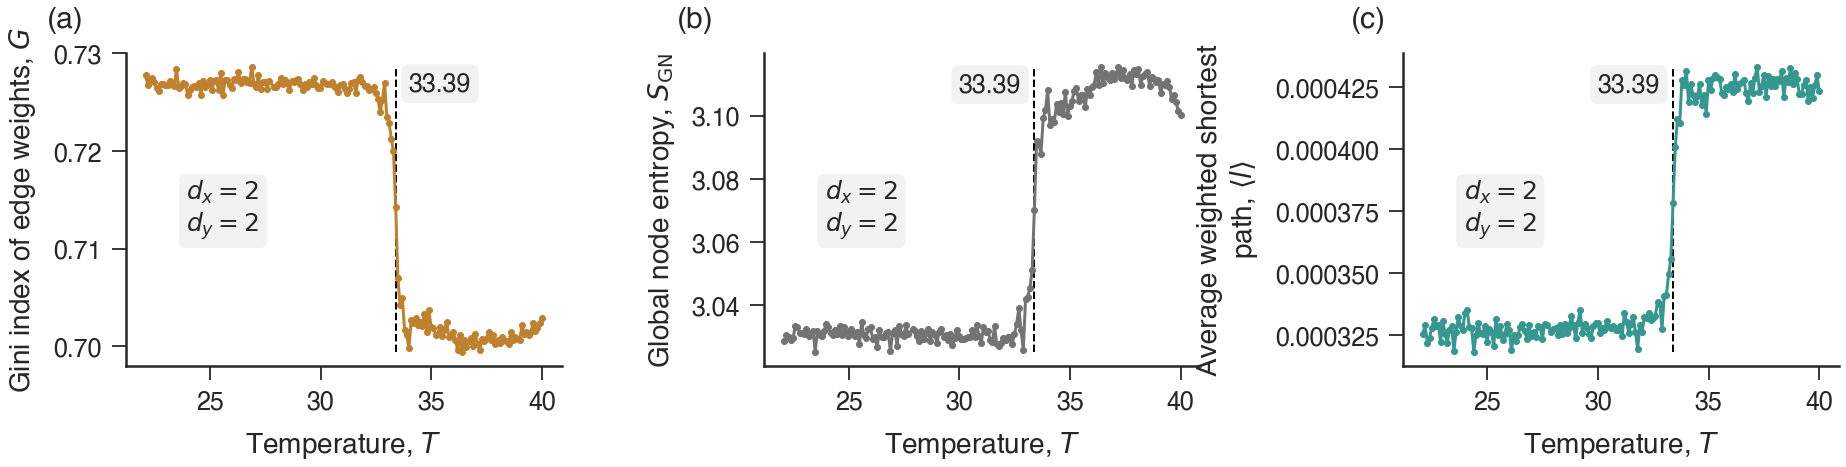

In [13]:
sample_index  = 4 #sample used to make Fig. 1. Third sample of 8CB - R811 3.26%. 

temps_8cb326   = temps_8cb[sample_index]
temps_8cb326   = temps_8cb326[temps_8cb326<40] #restricting the temperature range to evidence abrupt changes in network metrics.

ordnets_8cb326 = ordnets_8cb[sample_index][:len(temps_8cb326)]
tc_8cb326      = critical_temps[sample_index]

#network properties
short_path_   = [] 
gini_         = []
gne_          = []
for ordnet_ in ordnets_8cb326:        
    short_path_.append(safe_avg_shortpath(ordnet_))
    gini_.append(gini_faster(ordnet_))
    gne_.append(global_node_entropy(ordnet_))


#Figure
f, ax = plt.subplots(ncols=3, figsize=stdfigsize(ncols=3, scale=.95))
ax    = ax.flatten()

ylabels = ['Gini index of edge weights, $G$', r'Global node entropy, $S_{\rm GN}$', r'Average weighted shortest' + '\n' + r'path, $\langle l \rangle$']
xlabels = [r'Temperature, $T$']*3
# xlabels = [r'Temperature, $T$ ($^{\circ}{\rm C}$)']*3
# colors  = palettable.cmocean.diverging.Balance_5.hex_colors[1::2]
# colors.insert(1,'#737373')

colors = ["#bf812d", "#737373", "#35978f"]
# colors = ["#01665e", "#737373", "#8c510a"]

for y_, i_, cl_ in zip([gini_, gne_, short_path_], range(3), colors):
    ax[i_].set_ylabel(ylabels[i_])
    ax[i_].set_xlabel(xlabels[i_])

#actual data plotting    
    ax[i_].plot(temps_8cb326, y_, '-o', linewidth=3, color=cl_)

#vertical lines marking the critical temperatures (based on a network measure) for an experiment. 
#Our strategy for determining a critical temperature based on a netwrok measure consists in looking for
#the maximum change in the said measure between consecutive temperatures.
    if i_==0:
        ax[i_].vlines(tc_8cb326, min(gini_), max(gini_), linestyles='--', linewidth=2, zorder=0, color='black')
        ax[i_].annotate(r'{}'.format(tc_8cb326), (tc_8cb326+2, max(gini_)-0.0005),  va='top', ha='center',fontsize=25,
                        bbox={'boxstyle':'round', 'fc':'grey', 'alpha':.1})
        ax[i_].annotate('$d_x=2$\n$d_y=2$', (.223, .5),  va='center', ha='center', xycoords='axes fraction',fontsize=25,
                        bbox={'boxstyle':'round', 'fc':'grey', 'alpha':.1})
    elif i_==1:
        ax[i_].vlines(tc_8cb326, min(gne_), max(gne_), linestyles='--', linewidth=2, zorder=0, color='black')
        ax[i_].annotate(r'{}'.format(tc_8cb326), (tc_8cb326-2, max(gne_)-0.0095),  va='bottom', ha='center',fontsize=25,
                        bbox={'boxstyle':'round', 'fc':'grey', 'alpha':.1})
        ax[i_].annotate('$d_x=2$\n$d_y=2$', (.223, .5),  va='center', ha='center', xycoords='axes fraction',fontsize=25,
                        bbox={'boxstyle':'round', 'fc':'grey', 'alpha':.1})
    else:
        ax[i_].vlines(tc_8cb326, min(short_path_), max(short_path_), linestyles='--', linewidth=2, zorder=0, color='black')
        ax[i_].annotate(r'{}'.format(tc_8cb326), (tc_8cb326-2, max(short_path_)-0.000012),  va='bottom', ha='center',fontsize=25,
                        bbox={'boxstyle':'round', 'fc':'grey', 'alpha':.1})
        ax[i_].annotate('$d_x=2$\n$d_y=2$', (.223, .5),  va='center', ha='center', xycoords='axes fraction',fontsize=25,
                        bbox={'boxstyle':'round', 'fc':'grey', 'alpha':.1})

for i_, ax, xcoord_ in zip(range(3), ax, [-0.18, -0.20, -0.12]):
    ax.annotate('(' + string.ascii_lowercase[i_] + ')', (xcoord_, 1.08), xycoords='axes fraction', fontsize=30)
        
f.tight_layout()
f.savefig('final_figures/fig1/fig1_lower.svg', dpi=300, bbox_inches='tight')

In [36]:
#Drawing networks to be used in Figure 1. It takes a while to run (~ 2 min).

texture_transition_temp_8cb326 = ['33.1900', '33.2900', '33.3900', '33.4900', '33.5900']
texture_transition_8cb326      = [
                                  'lc_pictures/8cb_r811_3.26%(segunda ordem)/8cb_r811_3.26%_3/33.1900.jpeg',
                                  'lc_pictures/8cb_r811_3.26%(segunda ordem)/8cb_r811_3.26%_3/33.2900.jpeg',
                                  'lc_pictures/8cb_r811_3.26%(segunda ordem)/8cb_r811_3.26%_3/33.3900.jpeg',
                                  'lc_pictures/8cb_r811_3.26%(segunda ordem)/8cb_r811_3.26%_3/33.4900.jpeg',
                                  'lc_pictures/8cb_r811_3.26%(segunda ordem)/8cb_r811_3.26%_3/33.5900.jpeg'
                                 ]

for texture_, temp_ in zip(texture_transition_8cb326, texture_transition_temp_8cb326):
    image  = PIL.Image.open(texture_)
    matrix = np.asarray(image).mean(axis=2)

    nodes, edges, weights = ordinal_network(matrix, dx=2, dy=2)
    
    network = igraph.Graph(directed=True)
    network.add_vertices(nodes)
    network.add_edges(edges)
    network.vs["label"]  = nodes
    network.es["weight"] = weights

    w_ = np.asarray(network.strength(mode='IN', weights='weight'))
    w_ = w_/w_.max()
    igplot_black(network,
                 vertex_size=5+50*w_**2,
                 vertex_font_size=2+18*w_**2,
                 edge_width_scale=40,
                 vertex_color='#969696',
                 #
                 vertex_label_color='black',
                 layout='layout_fruchterman_reingold',
                 edge_arrow_size=.4,
                 box=(500,500),
                 #
#                  export_file='final_figures/fig1/graph_transition_{}.svg'.format(temp_)
                )

## Fig. 2

In [14]:
transition_ordnets_weights = np.concatenate(transition_nets_weights, axis=0) #shape (155, 416). 155 refers to 5 images (near phase transition) from each of the 31 samples.
                                                                             #416 is the maximum number of edges in an ordinal network when dx=dy=2.
X = transition_ordnets_weights
Y = transition_classes

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, stratify=Y)

In [15]:
# # Data to plot Figure 2.

# #time to run: ~ 1 min
# scores   = []
# matrices = []

# for counter_ in range(100):
#     Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, stratify=Y)
#     grid_transrfc = GridSearchCV(KNeighborsClassifier(), 
#                                  param_grid={"n_neighbors": np.arange(1, 50, 1)}, #systematically testing the 0-50 neighbors range.
#                                  scoring='accuracy', 
#                                  n_jobs=-1, 
#                                  cv=5, 
#                                  verbose=False,
#                                  return_train_score=True)
    
#     grid_transrfc.fit(Xtrain, ytrain)
#     score_ = grid_transrfc.best_estimator_.score(Xtest, ytest)

#     print('Best estimator *Random Forest* estimator: ', grid_transrfc.best_estimator_,'\n', 'Score: ', score_)
    
#     scores   += [score_]
#     matrices += [confusion_matrix(ytest, grid_transrfc.best_estimator_.predict(Xtest), normalize='true')]

#     if not counter_==100:
#         pass
    
#     else:
        
#         f, ax = plt.subplots()

#         ax.plot(np.arange(1, 100, 1), grid_transrfc.cv_results_['mean_test_score'], '-', color='red', label='CV - test set')
#         ax.plot(np.arange(1, 100, 1), grid_transrfc.cv_results_['mean_train_score'], '-', color='blue', label='CV - train set')
#         ax.set_ylabel("Coefficient of\ndetermination, $R^2$")
#         ax.set_xlabel("Number of estimators")
#         ax.legend()

#         f.tight_layout()
#         plt.show()

In [16]:
# np.save('statistical-learning-models/phase_transition_classification_scores.npy', scores)
# np.save('statistical-learning-models/phase_transition_classification_matrices.npy', matrices)

scores   = np.load('statistical-learning-models/phase_transition_classification_scores.npy')
matrices = np.load('statistical-learning-models/phase_transition_classification_matrices.npy')

In [17]:
trans_dummy_mode             = DummyClassifier(strategy="most_frequent")
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, stratify=Y, random_state=42)

trans_dummy_mode.fit(Xtrain, ytrain)

print(classification_report(ytest, trans_dummy_mode.predict(Xtest), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        33

    accuracy                           0.85        39
   macro avg       0.42      0.50      0.46        39
weighted avg       0.72      0.85      0.78        39



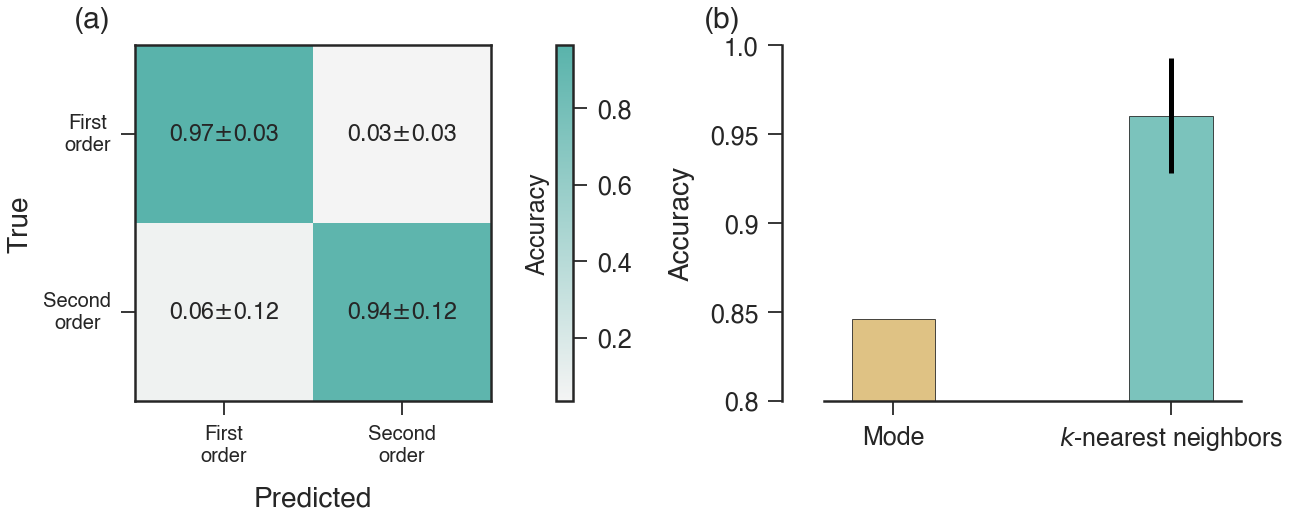

In [18]:
f, ax  = plt.subplots(nrows=1, ncols=2, figsize=stdfigsize(scale=1, nrows=1, ncols=2))
ax     = ax.flatten()

colors = ['#C05A3C', '#3888BA'] #palettable.cmocean.diverging.Balance_5_r.hex_colors[1::2]

# 

# ax[0].spines['top'].set_visible(True)
# ax[0].spines['right'].set_visible(True)
ax[0].set_xlabel("Predicted", labelpad=20)
ax[0].set_ylabel("True", labelpad=10)
ax[0].set_xticks([0, 1])
ax[0].set_yticks([0, 1])
ax[0].spines['top'].set_visible(True)
ax[0].spines['right'].set_visible(True)
ax[0].set_yticklabels(["First\norder", "Second\norder"], fontdict={"ma": 'center', "va":'center', 'size':20})
ax[0].set_xticklabels(["First\norder", "Second\norder"], fontdict={"ma": 'center', "ha":'center','size':20})



stdmatrix = np.std(matrices, axis=0)[[1,0]]
matrix = np.mean(matrices, axis=0)
matrix = matrix[:,[0,1]]
matrix = matrix[:,[1,0]]
matrix = matrix[[1,0]] #swapping lines so first line is first-order transitions and second line is second order transitions

cmap_  = LinearSegmentedColormap.from_list('my_list', np.asarray(palettable.colorbrewer.diverging.BrBG_3.colors)[1:]/256)
bx     = ax[0].imshow(matrix, cmap=cmap_, interpolation="nearest") #colorbar from white to green.

cbar = plt.colorbar(bx, ax=ax[0], pad=0.13, shrink=1)
cbar.set_label("Accuracy", labelpad=-106, fontsize=25)
# bx.figure.axes[-1].yaxis.set_ticklabels(np.arange(0.25,.9,.25).round(decimals=2), size=20)
# bx.figure.axes[-1].yaxis.set_ticklabels(np.arange(0.25,.9,.25).round(decimals=2), size=20)

for i in range(2):
    for j in range(2):
        m_, std_ = matrix.round(decimals=2)[i, j], stdmatrix.round(decimals=2)[i, j]
        ax[0].text(j, i, str(m_) + r"$\pm$" + str(std_), fontsize=23, va='center', ha='center')
        
class_bars = np.asarray([accuracy_score(ytest, trans_dummy_mode.predict(Xtest)), np.mean(scores)])

cbarplot_  = [palettable.colorbrewer.diverging.BrBG_3.hex_colors[0], 
              palettable.colorbrewer.diverging.BrBG_3.hex_colors[-1]
             ]

ax[1].set_ylim(0,0.20)
ax[1].bar([1/3,2/3], class_bars-.8, yerr=[0, np.std(scores)], color=cbarplot_, 
          error_kw={'linewidth':5}, capsize=0, width=.1, edgecolor='#202020', alpha=.8)
ax[1].set_ylabel("Accuracy")
ax[1].set_xticks([1/3, 2/3])
ax[1].set_xticklabels(['Mode', '$k$-nearest neighbors'])
ax[1].set_yticks(np.arange(0, .24, .05).round(decimals=2))
ax[1].set_yticklabels(np.arange(0.8, 1.04, .05).round(decimals=2))
ax[1].spines['left'].set_bounds(0,.2)
ax[1].set_xlim(0.2, 0.8)
ax[1].spines['bottom'].set_bounds(0.25,.75)

# for i_, ax_, xcoord_, ycoord_ in zip(range(3), ax, [-0.39, -0.23], [1.08, 1.08]):
#     ax_.annotate('(' + string.ascii_lowercase[i_] + ')', (xcoord_, ycoord_), xycoords='axes fraction', fontsize=30)

for i_, ax_ in zip(range(3), ax):
    ax_.annotate('(' + string.ascii_lowercase[i_] + ')', (xcoord_, 1.05), xycoords='axes fraction', ha='center', fontsize=30)


f.tight_layout(w_pad=3)

f.savefig('final_figures/fig2/fig2.png', dpi=300, bbox_inches='tight')

# Fig. 3

### E7 - R811 (only)

In [19]:
fig3_e7_ordnets     = [np.load(file, allow_pickle=True) for file in e7_r811_files] 
fig3_e7_temps       = [np.load(file, allow_pickle=True) for file in e7_r811_tempfiles]

In [20]:
#Preparing data for the classification task whose reasults are shown in Fig. 3(a) and 3(c)

correct_classes        = []
weights_as_features    = []

classes_as_numbers     = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5]
critical_temps_e7_r811 = critical_temps[5:-14]
e7_files_names         = transition_names[5:-14]

for ordnets_, temps_, class_, name_, ct_ in zip(fig3_e7_ordnets, fig3_e7_temps, classes_as_numbers, e7_files_names, critical_temps_e7_r811):
    print(name_)

    full_networks = []
    temporary     = []
    for ordnet_, temp_ in zip(ordnets_, temps_):        
        if temp_<(ct_-1):
            weights_as_features.append(full_weight_list(ordnet_)) #checking for lacking transitions on ordinal networks while also collecting full networks to explore their weights as features of learning tasks.        
            correct_classes.append(class_)
        else:
            pass

E7_(somente nemático-isotrópico)|pure_e7
E7_(somente nemático-isotrópico)|pure_e7_2
e7_r811_0.75%|e7_r811_0.75%_2
e7_r811_0.75%|e7_r811_0.75%_3
e7_r811_3.14%|e7_r811_3.14%_2
e7_r811_3.14%|e7_r811_3.14%_3
e7_r811_5.5%|e7_r811_5.5%_2
e7_r811_5.5%|e7_r811_5.5%_3
e7_r811_8%|e7_r811_8%_2
e7_r811_8%|e7_r811_8%_3
e7_r811_23.2%|e7_r811_23.2%
e7_r811_23.2%|e7_r811_23.2%_2


In [21]:
e7X = weights_as_features # shape: (1527, 416) - 1527 diferent samples and 416 edge weights of ordinal networks.
e7Y = correct_classes

e7X_train, e7X_test, e7y_train, e7y_test = train_test_split(e7X, e7Y, test_size=.25, stratify=e7Y, random_state=42)

In [22]:
# #Searching for best parameters. Training the model.

# grid_e7 = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': np.arange(1, 50, 1)}, 
#                        scoring='accuracy', n_jobs=-1, cv=5, verbose=True, 
#                        return_train_score=True)

# #time to run ~ 15s
# grid_e7 = grid_e7.fit(e7X_train, e7y_train)
# score_  = grid_e7.best_estimator_.score(e7X_test, e7y_test)
# e7_clf_ = grid_e7.best_estimator_

# print('Best estimator: ', grid_e7.best_estimator_,'\n', 'Score: ', score_)


# f, ax = plt.subplots()

# ax.plot(np.arange(1, 50, 1), grid_e7.cv_results_['mean_test_score'], '-', color='red', label='CV - test set')
# ax.plot(np.arange(1, 50, 1), grid_e7.cv_results_['mean_train_score'], '-', color='blue', label='CV - train set')
# ax.set_ylabel("Coefficient of\ndetermination, $R^2$")
# ax.set_xlabel("Number of estimators")
# ax.legend()

# f.tight_layout()
# plt.show()

# print('\n')

In [23]:
# pickle.dump(grid_e7.best_estimator_, open('statistical-learning-models/classifier-e7', 'wb'))
e7_clf_ = pickle.load(open('statistical-learning-models/classifier-e7', 'rb'))

In [24]:
e7_dummy_stratified = DummyClassifier(strategy="stratified")
e7_dummy_mode       = DummyClassifier(strategy="most_frequent")

e7_dummy_stratified.fit(e7X_train, e7y_train)
e7_dummy_mode.fit(e7X_train, e7y_train)

print(classification_report(e7y_test, e7_clf_.predict(e7X_test)), '\n\n',
      classification_report(e7y_test, e7_dummy_stratified.predict(e7X_test)), '\n\n',
      classification_report(e7y_test, e7_dummy_mode.predict(e7X_test), zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        70
           3       1.00      0.97      0.98        65
           4       1.00      0.98      0.99        62
           5       0.93      1.00      0.96        40

    accuracy                           0.99       382
   macro avg       0.99      0.99      0.99       382
weighted avg       0.99      0.99      0.99       382
 

               precision    recall  f1-score   support

           0       0.23      0.21      0.22        73
           1       0.18      0.21      0.19        72
           2       0.23      0.23      0.23        70
           3       0.18      0.18      0.18        65
           4       0.19      0.16      0.17        62
           5       0.09      0.10      0.10        40

    accuracy                           0.19       382
   macro avg       0

### E7 - R811 and S811

In [25]:
fig3_e7_s811_ordnets = [np.load(file, allow_pickle=True) for file in e7_s811_files] 
fig3_e7_s811_temps   = [np.load(file, allow_pickle=True) for file in e7_s811_tempfiles]

In [26]:
#Preparing data for the classification task whose reasults are shown in Fig. 3(b) and 3(d)

s811_correct_classes        = []
s811_weights_as_features    = []

s811_classes_as_numbers = [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 4, 4, 5, 5]
e7_s811_files_names     = transition_names[-14:]
critical_temps_e7_s811  = critical_temps[-14:]


for ordnets_, temps_, class_, name_, ct_ in zip(fig3_e7_s811_ordnets, fig3_e7_s811_temps, s811_classes_as_numbers, e7_s811_files_names, critical_temps_e7_s811):
    print(name_)
    
    for ordnet_, temp_ in zip(ordnets_, temps_):        
        if temp_<(ct_-1):
            s811_weights_as_features.append(full_weight_list(ordnet_)) #checking for lacking transitions on ordinal networks while also collecting full networks to explore their weights as features of learning tasks.        
            s811_correct_classes.append(class_)
        else:
            pass

R811_0_S811_10|2021-04-08_SOBE_1
R811_0_S811_10|2021-04-08_SOBE_2
R811_0_S811_10|2021-04-08_SOBE_3
R811_1_S811_9|2021-04-05_SOBE_1
R811_1_S811_9|2021-04-05_SOBE_2
R811_1_S811_9|2021-04-05_SOBE_3
R811_2_S811_8|2021-04-01_SOBE_1
R811_2_S811_8|2021-04-01_SOBE_2
R811_2_S811_8|2021-04-01_SOBE_3
R811_3_S811_7|2021-03-31_SOBE_1
R811_4_S811_6|2021-03-25_SOBE_3
R811_4_S811_6|2021-03-29_SOBE_4
R811_4.85_S811_5.15|2021-04-12_SOBE_1
R811_4.85_S811_5.15|2021-04-12_SOBE_2


In [27]:
e7_s811_X = s811_weights_as_features # shape: (1813, 416). 
e7_s811_Y = s811_correct_classes

racemic_X_train, racemic_X_test, racemic_y_train, racemic_y_test = train_test_split(e7_s811_X, e7_s811_Y, test_size=.25, stratify=e7_s811_Y, random_state=42)

In [28]:
# #Training model. Searching for best parameters

# racemic_class_grid = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': np.arange(1, 50, 1)}, 
#                                   scoring='accuracy', n_jobs=-1, cv=5, verbose=10, 
#                                   return_train_score=True)

# #time to run: ~ 1min
# racemic_class_grid = racemic_class_grid.fit(racemic_X_train, racemic_y_train)
# score_             = racemic_class_grid.best_estimator_.score(racemic_X_test, racemic_y_test)
# racemic_clf_       = racemic_class_grid.best_estimator_

# print('Best estimator: ', racemic_class_grid.best_estimator_, 'Score: ', score_)


# f, ax = plt.subplots()

# ax.plot(np.arange(1, 50, 1), racemic_class_grid.cv_results_['mean_test_score'], '-o', color='red', label='CV - test set')
# ax.plot(np.arange(1, 50, 1), racemic_class_grid.cv_results_['mean_train_score'], '-o', color='blue', label='CV - train set')
# ax.set_ylabel("Coefficient of\ndetermination, $R^2$")
# ax.set_xlabel("Number of estimators")
# ax.legend()

# f.tight_layout()
# plt.show()

# print('\n')

In [29]:
# pickle.dump(racemic_clf_, open('statistical-learning-models/classifier-racemic', 'wb'))
racemic_clf_ = pickle.load(open('statistical-learning-models/classifier-racemic', 'rb'))

In [30]:
racemic_dummy_stratified = DummyClassifier(strategy="stratified")
racemic_dummy_mode       = DummyClassifier(strategy="most_frequent")

racemic_dummy_stratified.fit(racemic_X_train,racemic_y_train)
racemic_dummy_mode.fit(racemic_X_train,racemic_y_train)

print(classification_report(racemic_y_test, racemic_dummy_stratified.predict(racemic_X_test)), '\n\n',
      classification_report(racemic_y_test, racemic_dummy_mode.predict(racemic_X_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25        93
           1       0.17      0.16      0.16       100
           2       0.21      0.23      0.22       101
           3       0.06      0.06      0.06        31
           4       0.12      0.13      0.13        68
           5       0.21      0.18      0.19        61

    accuracy                           0.19       454
   macro avg       0.17      0.17      0.17       454
weighted avg       0.19      0.19      0.19       454
 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.00      0.00      0.00       100
           2       0.22      1.00      0.36       101
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        68
           5       0.00      0.00      0.00        61

    accuracy                           0.22       454
   macro avg       0

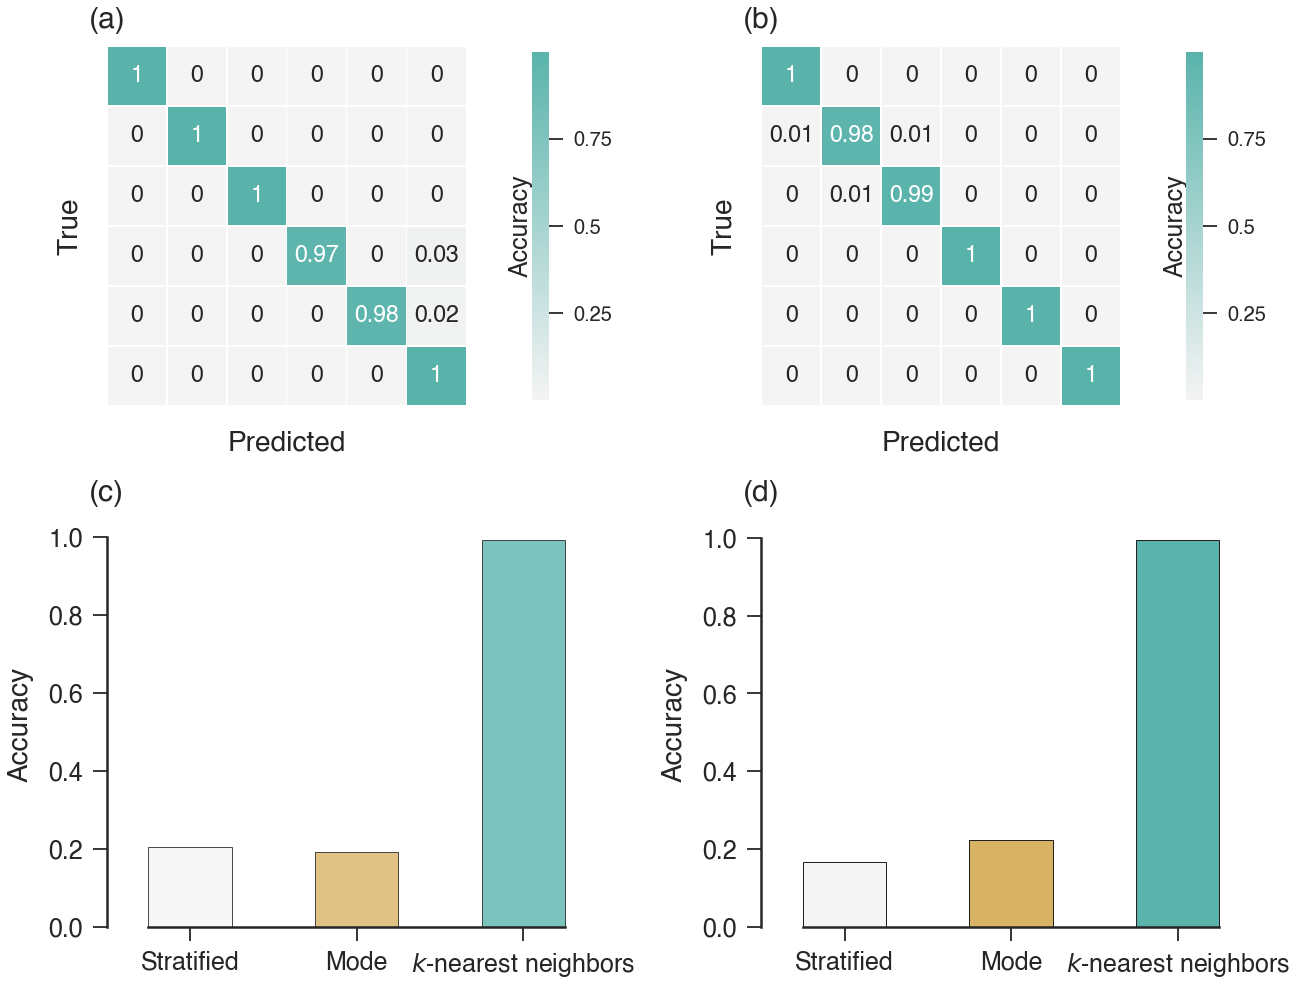

In [31]:
f, ax  = plt.subplots(nrows=2, ncols=2, figsize=stdfigsize(nrows=2, ncols=2, scale=1))
ax     = ax.flatten()


cbarplot_  = [palettable.colorbrewer.diverging.BrBG_3.hex_colors[1],
              palettable.colorbrewer.diverging.BrBG_3.hex_colors[0],
              palettable.colorbrewer.diverging.BrBG_3.hex_colors[-1]
             ]


e7matrix   = confusion_matrix(e7y_test, e7_clf_.predict(e7X_test), normalize='true').round(decimals=2)
cmap_      = LinearSegmentedColormap.from_list('my_list', np.asarray(palettable.colorbrewer.diverging.BrBG_3.colors)[1:]/256) #white to green colormap

bx = sns.heatmap(e7matrix, 
            annot=True,
            annot_kws={'fontsize': 23},
            linewidths=.5, 
            ax=ax[0],
#             cmap=palettable.colorbrewer.diverging.BrBG_3.get_mpl_colormap(),#old colorscheme
            cmap=cmap_,
            cbar=True,
            cbar_kws={"ticks": np.arange(0.25,1,.25).round(decimals=2),
                      "pad": 0.13,
                      "shrink": .86,
                     },
            square=True
           )
bx.collections[0].colorbar.set_label(label="Accuracy",labelpad=-103, fontsize=25)
bx.figure.axes[-1].yaxis.set_ticklabels(np.arange(0.25,1,.25).round(decimals=2),size=20)

ax[0].set_xlabel("Predicted", labelpad=0)
ax[0].set_ylabel("True", labelpad=0)
ax[0].tick_params(left=False, top=False, bottom=False)
ax[0].set_xticklabels('')
ax[0].set_yticklabels('')
for spine_ in ['bottom', 'left', 'right', 'top']:
    ax[0].spines[spine_].set_visible(False)


racemic_matrix = confusion_matrix(racemic_y_test, racemic_clf_.predict(racemic_X_test), normalize='true').round(decimals=2)

cx = sns.heatmap(racemic_matrix, 
            annot=True,
            annot_kws={'fontsize': 23},
            linewidths=.5, 
            ax=ax[1],
#             cmap=palettable.colorbrewer.diverging.BrBG_3.get_mpl_colormap(), #old colorscheme
            cmap=cmap_,
            cbar=True,
           cbar_kws={"ticks": np.arange(0.25,1,.25).round(decimals=2),
                     "pad": 0.13,
                     "shrink": .86,
                     },
            square=True
           )
cx.collections[0].colorbar.set_label(label="Accuracy",labelpad=-103, fontsize=25)
cx.figure.axes[-1].yaxis.set_ticklabels(np.arange(0.25,1,.25).round(decimals=2),size=20)



ax[1].set_xlabel("Predicted", labelpad=0)
ax[1].set_ylabel("True", labelpad=0)
ax[1].tick_params(left=False, top=False, bottom=False)
ax[1].set_xticklabels('')
ax[1].set_yticklabels('')
for spine_ in ['bottom', 'left', 'right', 'top']:
    ax[1].spines[spine_].set_visible(False)        
    
#################################################################################
class_bars = [accuracy_score(e7y_test, e7_dummy_stratified.predict(e7X_test)),
              accuracy_score(e7y_test, e7_dummy_mode.predict(e7X_test)),
              accuracy_score(e7y_test, e7_clf_.predict(e7X_test))
             ]

ax[2].bar([.3, 2/4, .7], class_bars, color=cbarplot_, width=.1, edgecolor='#202020', alpha=.8)
ax[2].set_ylabel("Accuracy")
ax[2].set_xticks([.3, 2/4, .7])
ax[2].set_xticklabels(['Stratified', 'Mode', '$k$-nearest neighbors'])
ax[2].set_yticks(np.arange(0, 1.1, .2).round(decimals=1))
ax[2].spines['left'].set_bounds(0,1)
ax[2].set_xlim(0.2, 0.8)
ax[2].spines['bottom'].set_bounds(0.25, 0.75)

    
racemic_class_bars = [
                      accuracy_score(racemic_y_test, racemic_dummy_stratified.predict(racemic_X_test)),
                      accuracy_score(racemic_y_test, racemic_dummy_mode.predict(racemic_X_test)),
                      accuracy_score(racemic_y_test, racemic_clf_.predict(racemic_X_test))
                     ]

ax[3].bar([.3, 2/4, .7], racemic_class_bars, color=cbarplot_, width=.1, edgecolor='#202020')
ax[3].set_ylabel("Accuracy")
ax[3].set_xticks([.3, 2/4, .7])
ax[3].set_xticklabels(['Stratified', 'Mode', '$k$-nearest neighbors'])
ax[3].set_yticks(np.arange(0, 1.1, .2).round(decimals=1))
ax[3].spines['left'].set_bounds(0,1)
ax[3].set_xlim(0.2, 0.8)
ax[3].spines['bottom'].set_bounds(0.25, 0.75)

# for i_, ax_, xcoord_ in zip(range(4), ax, [-.275]*2+[-.205]*2):
#     ax_.annotate('(' + string.ascii_lowercase[i_] + ')', (xcoord_, 1.0), xycoords='axes fraction', fontsize=30)


for i_, ax_, xcoord_ in zip(range(4), ax, [0]*4):
    ax_.annotate('(' + string.ascii_lowercase[i_] + ')', (xcoord_, 1.05), xycoords='axes fraction', ha='center', fontsize=30)


f.tight_layout(w_pad=2)
f.savefig('final_figures/fig3/fig3.png', bbox_inches='tight', dpi=300)

# Fig. 4

### E7 - R811 (only)

In [32]:
def ordnet_sliced_images(path, height=800, width=175):
    """
    Augments the number of images at a certain temperature, 
    for a samples with a fixed doping concentration. 
    Original image size: 800 (height) x 1070 (width). 
    
    Parameters
    ----------
    path   : path to a folder containing images of a 
             liquid crystal.
    height : height of the final crop.
    width  : wifth of the final crop.
    ----------
    Returns an augmented set of ordinal networks obtained from the 
    original pictures as well as their corresponding temperatures.
    """
    e7_temperatures     = []
    e7_replicas         = []
    
    for sub_folders in sorted(glob.glob(path)):
        print(sub_folders)
        
        temps_classes = []

        for sample_path in sorted(glob.glob(sub_folders+'/*')):
            temperature  = float(sample_path[-12:-5])
            
#             if temperature>25 and temperature<44: #restricting the range to an interval which does not encompasses a phase transition.
    
            picture   = mpimg.imread(sample_path) 
            picture   = picture.mean(axis=2)

            for width_ in np.arange(0,1071-width,width):
                for height_ in np.arange(0,801-height,height):
                    slice_ = picture[height_:height_+height, width_:width_+width]
                    e7_replicas.append(dask.delayed(full_ordinal_network, pure=True)(slice_))
                    e7_temperatures.append(temperature)

#             else:
#                 pass
    
    return e7_temperatures, e7_replicas

In [33]:
def ordnet_sliced_racemic_images(path, height=800, width=175):
    """
    Augments the number of images at a certain temperature, 
    for a samples with a fixed doping concentration. 
    Original image size: 800 (height) x 1070 (width). 
    
    Parameters
    ----------
    path : str
           path to sets of cropped images (size: 800 
           (height) x 1070 (width)).
    height : int
             integer between 1 and 800 (default: 800).
    width : int
            integer between 1 and 1070 (default: 175).
    ----------
    Returns a set of full ordinal networks (ordinal networks with
    all the edge weiths, including the ones which are zero) from 
    pictures. Six "sub-images" from a texture example is the 
    standard return.
    """ 
    classes  = []
    replicas = []
    
    for sub_folders in sorted(glob.glob(path)):
        print(sub_folders)
        temps = []        
        
        for sample_path in sorted(glob.glob(sub_folders+"/*")):
            temperature  = float(sample_path[-12:-5])
            
#             if temperature>41. and temperature<54.: #before phase transition in any of the experiments
    #             print(temperature) #temperature
            picture   = mpimg.imread(sample_path) 
            picture   = picture.mean(axis=2)

            for width_ in np.arange(0,1071-width,width):
                for height_ in np.arange(0,801-height,height):
                    slice_ = picture[height_:height_+height, width_:width_+width]
                    replicas.append(dask.delayed(full_ordinal_network, pure=True)(slice_))
                    classes.append(temperature)
#             else:
#                 pass

    return classes, replicas

In [20]:
# e7_r811_paths = [
#                 'lc_pictures/E7_(somente nemático-isotrópico)/*',
#                 'lc_pictures/e7_r811_0.75%/*',
#                 'lc_pictures/e7_r811_3.14%/*',
#                 'lc_pictures/e7_r811_5.5%/*',
#                 'lc_pictures/e7_r811_8%/*',
#                 'lc_pictures/e7_r811_23.2%/*',
#                 ]

# for path_ in e7_r811_paths:
#     e7_r811_replicas_temps, e7_r811_replicas = ordnet_sliced_images(path_)
    
#     print('Temperature range: ', np.min(e7_r811_replicas_temps), '--', np.max(e7_r811_replicas_temps))
    
#     print(path_[12:-2], '\n')
#     with ProgressBar():
#         e7_r811_replicas = compute(e7_r811_replicas)

# # #     np.save('final_pickles/{}_replicas.npy'.format(path_[12:-2]), e7_r811_replicas)
# # #     np.save('final_pickles/{}_replicas_temperatures.npy'.format(path_[12:-2]), e7_r811_replicas_temps)

In [21]:
# e7_s811_paths = [
#                 'lc_pictures/R811_0_S811_10/*',
#                 'lc_pictures/R811_1_S811_9/*',
#                 'lc_pictures/R811_2_S811_8/*',
#                 'lc_pictures/R811_3_S811_7/*',
#                 'lc_pictures/R811_4_S811_6/*',
#                 'lc_pictures/R811_4.85_S811_5.15/*'
#                 ]

# for path_ in e7_s811_paths:
#     e7_s811_replicas_temps, e7_s811_replicas = ordnet_sliced_racemic_images(path_)
        
#     print('Temperature range: ', np.min(e7_s811_replicas_temps), '--', np.max(e7_s811_replicas_temps))

#     print(path_[12:-2], '\n')
#     with ProgressBar():
#         e7_s811_replicas = compute(e7_s811_replicas)

# #     np.save('final_pickles/e7_{}_replicas.npy'.format(path_[12:-2]), e7_s811_replicas)
# #     np.save('final_pickles/e7_{}_replicas_temperatures.npy'.format(path_[12:-2]), e7_s811_replicas_temps)

In [34]:
e7_pure_temps    = np.load('final_pickles/E7_(somente nemático-isotrópico)_replicas_temperatures.npy', allow_pickle=True)
indices          = np.argwhere((e7_pure_temps>24.9999) & (e7_pure_temps<44.0001)).flatten()
e7_pure_temps    = e7_pure_temps[indices]
e7_pure_replicas = np.load('final_pickles/E7_(somente nemático-isotrópico)_replicas.npy', allow_pickle=True)[0][indices]


e7_075_temps    = np.load('final_pickles/e7_r811_0.75%_replicas_temperatures.npy', allow_pickle=True)
indices         = np.argwhere((e7_075_temps>24.9999) & (e7_075_temps<44.0001)).flatten()
e7_075_temps    = e7_075_temps[indices]
e7_075_replicas = np.load('final_pickles/e7_r811_0.75%_replicas.npy', allow_pickle=True)[0][indices]


e7_314_temps     = np.load('final_pickles/e7_r811_3.14%_replicas_temperatures.npy', allow_pickle=True)
indices          = np.argwhere((e7_314_temps>24.9999) & (e7_314_temps<44.0001)).flatten()
e7_314_temps     = e7_314_temps[indices]
e7_314_replicas  = np.load('final_pickles/e7_r811_3.14%_replicas.npy', allow_pickle=True)[0][indices]


e7_55_temps      = np.load('final_pickles/e7_r811_5.5%_replicas_temperatures.npy', allow_pickle=True)
indices          = np.argwhere((e7_55_temps>24.9999) & (e7_55_temps<44.0001)).flatten()
e7_55_temps      = e7_55_temps[indices]
e7_55_replicas   = np.load('final_pickles/e7_r811_5.5%_replicas.npy', allow_pickle=True)[0][indices]


e7_8_temps       = np.load('final_pickles/e7_r811_8%_replicas_temperatures.npy', allow_pickle=True)
indices          = np.argwhere((e7_8_temps>24.9999) & (e7_8_temps<44.0001)).flatten()
e7_8_temps       = e7_8_temps[indices]
e7_8_replicas    = np.load('final_pickles/e7_r811_8%_replicas.npy', allow_pickle=True)[0][indices]


e7_232_temps     = np.load('final_pickles/e7_r811_23.2%_replicas_temperatures.npy', allow_pickle=True)
indices          = np.argwhere((e7_232_temps>24.9999) & (e7_232_temps<44.0001)).flatten()
e7_232_temps     = e7_232_temps[indices]
e7_232_replicas  = np.load('final_pickles/e7_r811_23.2%_replicas.npy', allow_pickle=True)[0][indices]

In [35]:
#Temperature between 25 and 44 degrees Celsius.

#Training for "temperature recognition", in spite of pitch, Regression task.
Y_e7 = np.concatenate((e7_pure_temps, e7_075_temps, e7_314_temps, e7_55_temps, e7_8_temps, e7_232_temps))
X_e7 = np.concatenate((e7_pure_replicas, e7_075_replicas, e7_314_replicas, e7_55_replicas, e7_8_replicas, e7_232_replicas))

reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(X_e7, Y_e7, test_size=.25, stratify=Y_e7, random_state=42)

In [36]:
#Regression shown in Fig. 4(a).

# grid_e7reg   = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors': np.arange(1, 50, 1)}, 
#                             scoring='r2', n_jobs=-1, cv=5, verbose=10, 
#                             return_train_score=True)

# #time to run ~ 1min
# grid_e7reg = grid_e7reg.fit(reg_X_train, reg_y_train)
# score_     = grid_e7reg.best_estimator_.score(reg_X_test, reg_y_test)
# # e7_reg_rf  = grid_e7reg.best_estimator_

# print('Best *Random Forest* estimator: ', grid_e7reg.best_estimator_, 'R^2 Score: ', score_)


# f, ax = plt.subplots(nrows=1, ncols=2, figsize=stdfigsize(scale=.9, nrows=1, ncols=2))

# ax[0].plot(np.arange(1, 50, 1), grid_e7reg.cv_results_['mean_test_score'], '-', color='red', label='CV - test set')
# ax[0].plot(np.arange(1, 50, 1), grid_e7reg.cv_results_['mean_train_score'], '-', color='blue', label='CV - train set')
# ax[0].set_ylabel("Coefficient of\ndetermination, $R^2$")
# ax[0].set_xlabel("Number of estimators")
# ax[0].legend()

# ax[1].plot(grid_e7reg.best_estimator_.predict(reg_X_test), reg_y_test, 'o', markersize=10, color='blue', alpha=.5, 
#            label="$R^2 = {}$".format(r2_score(reg_y_test, grid_e7reg.best_estimator_.predict(reg_X_test)).round(decimals=2)))
# ax[1].plot([reg_y_test.min(), reg_y_test.max()], [reg_y_test.min(), reg_y_test.max()], '--', color="black", linewidth=5)

# ax[1].set_xlabel("Predicted temperature")
# ax[1].set_ylabel("True temperature")
# ax[1].legend()

# f.tight_layout()
# plt.show()

# print('\n')

In [37]:
# pickle.dump(grid_e7reg, open('statistical-learning-models/grid_knn_e7r811', 'wb'))
grid_e7reg = pickle.load(open('statistical-learning-models/grid_knn_e7r811', 'rb'))

### Trying to predict temperature (racemic) interclasses

In [38]:
r811_0_s811_10_temps_sliced = np.load('final_pickles/e7_R811_0_S811_10_replicas_temperatures.npy', allow_pickle=True)
indices                     = np.argwhere((r811_0_s811_10_temps_sliced>40.9999) & (r811_0_s811_10_temps_sliced<54.0001)).flatten()
r811_0_s811_10_temps_sliced = r811_0_s811_10_temps_sliced[indices]
r811_0_s811_10_sliced       = np.load('final_pickles/e7_R811_0_S811_10_replicas.npy', allow_pickle=True)[0][indices]

r811_1_s811_9_temps_sliced = np.load('final_pickles/e7_R811_1_S811_9_replicas_temperatures.npy', allow_pickle=True)
indices                    = np.argwhere((r811_1_s811_9_temps_sliced>40.9999) & (r811_1_s811_9_temps_sliced<54.0001)).flatten()
r811_1_s811_9_temps_sliced = r811_1_s811_9_temps_sliced[indices]
r811_1_s811_9_sliced       = np.load('final_pickles/e7_R811_1_S811_9_replicas.npy', allow_pickle=True)[0][indices]

r811_2_s811_8_temps_sliced = np.load('final_pickles/e7_R811_2_S811_8_replicas_temperatures.npy', allow_pickle=True)
indices                    = np.argwhere((r811_2_s811_8_temps_sliced>40.9999) & (r811_2_s811_8_temps_sliced<54.0001)).flatten()
r811_2_s811_8_temps_sliced = r811_2_s811_8_temps_sliced[indices]
r811_2_s811_8_sliced       = np.load('final_pickles/e7_R811_2_S811_8_replicas.npy', allow_pickle=True)[0][indices]

r811_3_s811_7_temps_sliced = np.load('final_pickles/e7_R811_3_S811_7_replicas_temperatures.npy', allow_pickle=True)
indices                    = np.argwhere((r811_3_s811_7_temps_sliced>40.9999) & (r811_3_s811_7_temps_sliced<54.0001)).flatten()
r811_3_s811_7_temps_sliced = r811_3_s811_7_temps_sliced[indices]
r811_3_s811_7_sliced       = np.load('final_pickles/e7_R811_3_S811_7_replicas.npy', allow_pickle=True)[0][indices]

r811_4_s811_6_temps_sliced = np.load('final_pickles/e7_R811_4_S811_6_replicas_temperatures.npy', allow_pickle=True)
indices                    = np.argwhere((r811_4_s811_6_temps_sliced>40.9999) & (r811_4_s811_6_temps_sliced<54.0001)).flatten()
r811_4_s811_6_temps_sliced = r811_4_s811_6_temps_sliced[indices]
r811_4_s811_6_sliced       = np.load('final_pickles/e7_R811_4_S811_6_replicas.npy', allow_pickle=True)[0][indices]

r811_485_s811_515_temps_sliced = np.load('final_pickles/e7_R811_4.85_S811_5.15_replicas_temperatures.npy', allow_pickle=True)
indices                        = np.argwhere((r811_485_s811_515_temps_sliced>40.9999) & (r811_485_s811_515_temps_sliced<54.0001)).flatten()
r811_485_s811_515_temps_sliced = r811_485_s811_515_temps_sliced[indices]
r811_485_s811_515_sliced       = np.load('final_pickles/e7_R811_4.85_S811_5.15_replicas.npy', allow_pickle=True)[0][indices]

In [39]:
#Training for "temperature recognition", in spite of pitch. Regression task.
Y_regracemic = np.concatenate((r811_0_s811_10_temps_sliced, 
                               r811_1_s811_9_temps_sliced, 
                               r811_2_s811_8_temps_sliced, 
                               r811_3_s811_7_temps_sliced, 
                               r811_485_s811_515_temps_sliced, 
                               r811_4_s811_6_temps_sliced
                             ))

# shape: (6840, 416) - 6840 different samples (ordinal networks) with 416 edgeweights. 
# From each texture we divided its image in 6 (non-overllapping).
X_regracemic = np.concatenate((r811_0_s811_10_sliced, 
                               r811_1_s811_9_sliced, 
                               r811_2_s811_8_sliced, 
                               r811_3_s811_7_sliced, 
                               r811_485_s811_515_sliced,
                               r811_4_s811_6_sliced
                             ))

In [40]:
racreg_X_train, racreg_X_test, racreg_y_train, racreg_y_test = train_test_split(X_regracemic, Y_regracemic, test_size=1/4, stratify=Y_regracemic, random_state=42)

In [41]:
# #Regression shown in Fig. 4(b)

# grid_knn_racemic       = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors': np.arange(1,50,1)}, 
#                                     scoring='explained_variance', n_jobs=-1, cv=5, verbose=True, 
#                                     return_train_score=True)

# #time to run: ~ 1min


# grid_knn_racemic       = grid_knn_racemic.fit(racreg_X_train, racreg_y_train)
# score_knn_racemic      = grid_knn_racemic.best_estimator_.score(racreg_X_test, racreg_y_test)

# print('\nCharacteristics of the best *KNN* estimator', grid_knn_racemic.best_estimator_,'\n', '\nR^2 found in this regression task:', score_knn_racemic)

# f, ax = plt.subplots(nrows=1, ncols=2, figsize=stdfigsize(nrows=1, ncols=2))

# ax[0].plot(grid_knn_racemic.cv_results_['mean_test_score'], '-', color='red', label='Test set')
# ax[0].plot(grid_knn_racemic.cv_results_['mean_train_score'], '-', color='blue', label='Train set')
# ax[0].set_ylabel("Coefficient of\ndetermination, $R^2$")
# ax[0].set_xlabel("Number of estimators")
# ax[0].legend()

# ax[1].plot(grid_knn_racemic.best_estimator_.predict(racreg_X_test), racreg_y_test, 'o', markersize=10, color='blue', alpha=.5, 
#            label="$R^2 = {}$".format(r2_score(racreg_y_test, grid_knn_racemic.best_estimator_.predict(racreg_X_test)).round(decimals=2)))
# ax[1].plot([racreg_y_test.min(), racreg_y_test.max()], [racreg_y_test.min(), racreg_y_test.max()], '--', color="black", linewidth=5)
# ax[1].set_xlabel("Predicted temperature")
# ax[1].set_ylabel("True temperature")
# ax[1].legend()

# f.tight_layout()
# plt.show()

# print('\n')

In [42]:
# pickle.dump(grid_knn_racemic, open('statistical-learning-models/grid_knn_racemic', 'wb'))
grid_knn_racemic = pickle.load(open('statistical-learning-models/grid_knn_racemic', 'rb'))

# Predicting temperature (for a fixed concentration)

### Predicting temperature (E7) - fixed a concentration/class - using edge weights

In [43]:
e7_pure_temps_fullrange_sliced    = np.load('final_pickles/E7_(somente nemático-isotrópico)_replicas_temperatures.npy', allow_pickle=True)
e7_pure_replicas_fullrange_sliced = np.load('final_pickles/E7_(somente nemático-isotrópico)_replicas.npy', allow_pickle=True)[0]

e7_075_temps_fullrange_sliced    = np.load('final_pickles/e7_r811_0.75%_replicas_temperatures.npy', allow_pickle=True)
e7_075_replicas_fullrange_sliced = np.load('final_pickles/e7_r811_0.75%_replicas.npy', allow_pickle=True)[0]

e7_314_temps_fullrange_sliced    = np.load('final_pickles/e7_r811_3.14%_replicas_temperatures.npy', allow_pickle=True)
e7_314_replicas_fullrange_sliced = np.load('final_pickles/e7_r811_3.14%_replicas.npy', allow_pickle=True)[0]

e7_55_temps_fullrange_sliced    = np.load('final_pickles/e7_r811_5.5%_replicas_temperatures.npy', allow_pickle=True)
e7_55_replicas_fullrange_sliced = np.load('final_pickles/e7_r811_5.5%_replicas.npy', allow_pickle=True)[0]

e7_8_temps_fullrange_sliced    = np.load('final_pickles/e7_r811_8%_replicas_temperatures.npy', allow_pickle=True)
e7_8_replicas_fullrange_sliced = np.load('final_pickles/e7_r811_8%_replicas.npy', allow_pickle=True)[0]

e7_232_temps_fullrange_sliced    = np.load('final_pickles/e7_r811_23.2%_replicas_temperatures.npy', allow_pickle=True)
e7_232_replicas_fullrange_sliced = np.load('final_pickles/e7_r811_23.2%_replicas.npy', allow_pickle=True)[0]


e7_oneclass_temps = [e7_pure_temps_fullrange_sliced,
                     e7_075_temps_fullrange_sliced, 
                     e7_314_temps_fullrange_sliced,
                     e7_55_temps_fullrange_sliced, 
                     e7_8_temps_fullrange_sliced, 
                     e7_232_temps_fullrange_sliced
                     ]


e7_oneclass_nets  = [e7_pure_replicas_fullrange_sliced,
                     e7_075_replicas_fullrange_sliced,
                     e7_314_replicas_fullrange_sliced, 
                     e7_55_replicas_fullrange_sliced,
                     e7_8_replicas_fullrange_sliced,
                     e7_232_replicas_fullrange_sliced
                     ]

Fitting 5 folds for each of 99 candidates, totalling 495 fits

Characteristics of the best estimator KNeighborsRegressor(n_neighbors=3) 
 
R^2 found in this regression task: 0.9382189658443276


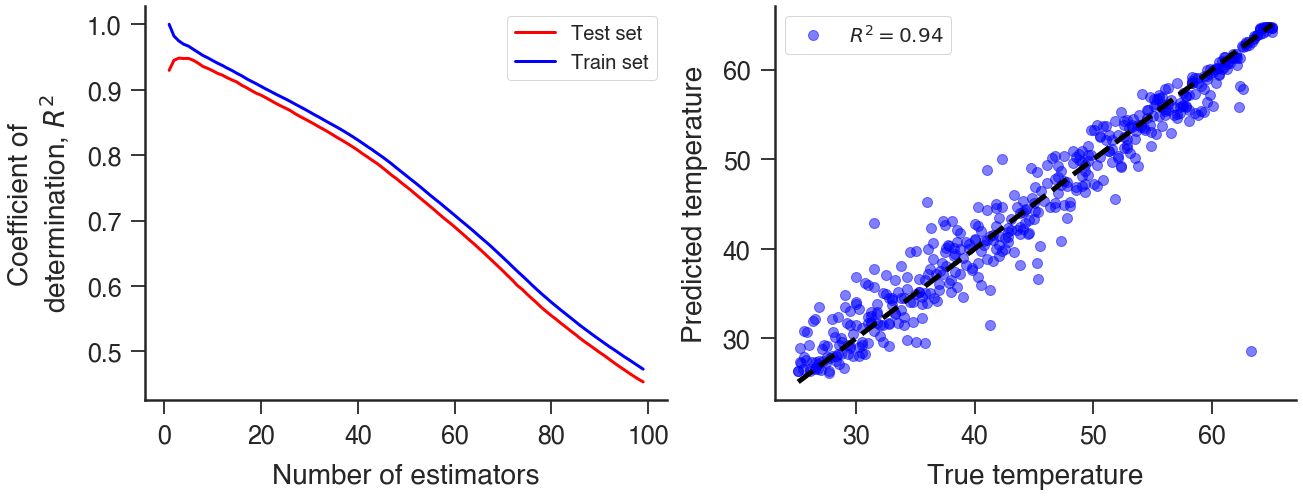



Fitting 5 folds for each of 99 candidates, totalling 495 fits

Characteristics of the best estimator KNeighborsRegressor(n_neighbors=2) 
 
R^2 found in this regression task: 0.9639748500011913


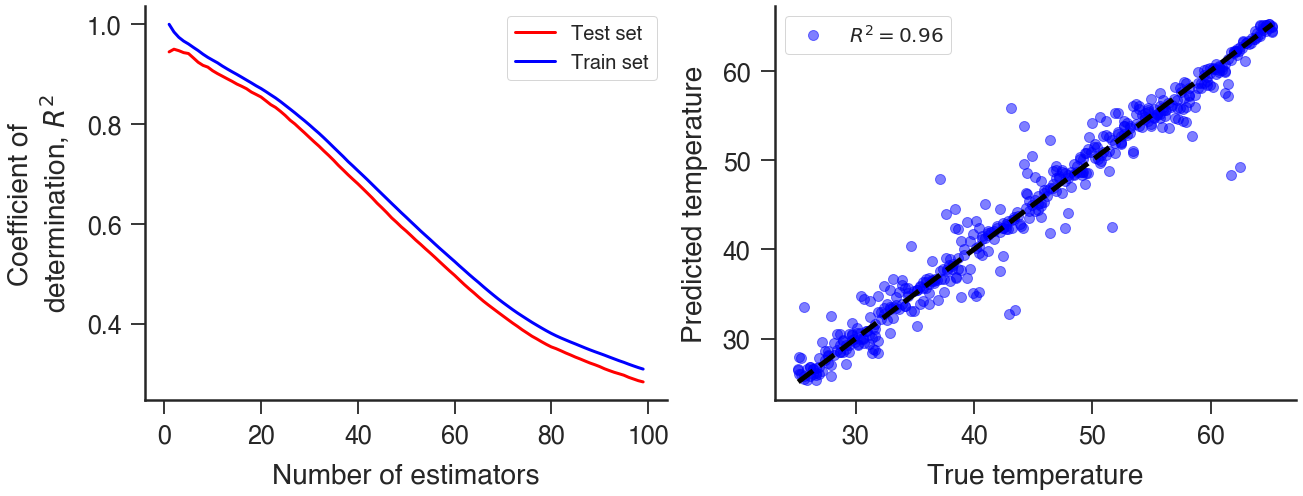



Fitting 5 folds for each of 99 candidates, totalling 495 fits

Characteristics of the best estimator KNeighborsRegressor(n_neighbors=2) 
 
R^2 found in this regression task: 0.9268151776048376


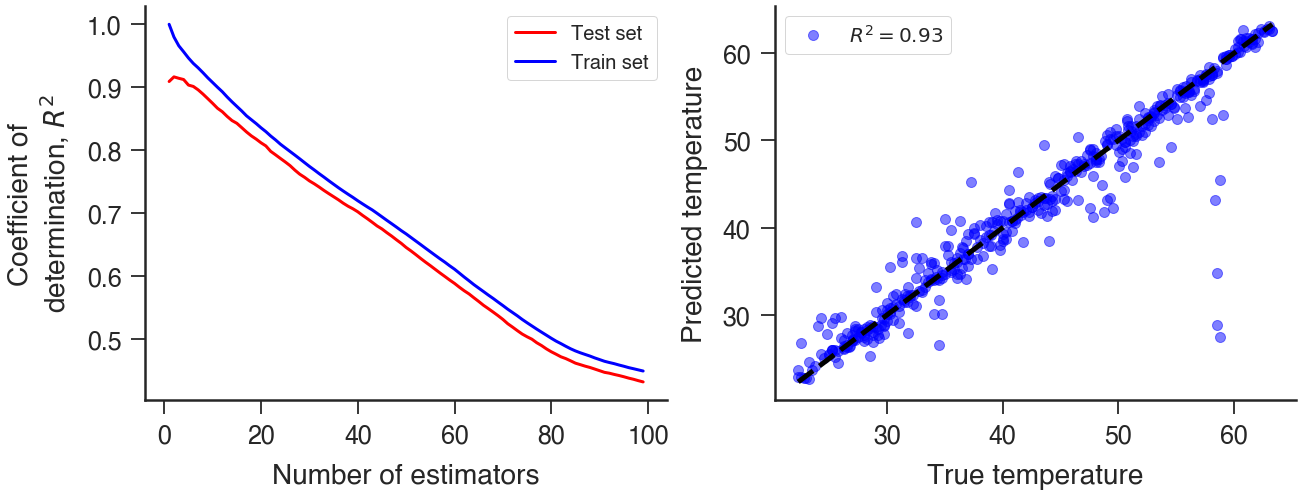



Fitting 5 folds for each of 99 candidates, totalling 495 fits

Characteristics of the best estimator KNeighborsRegressor(n_neighbors=3) 
 
R^2 found in this regression task: 0.9713366249619796


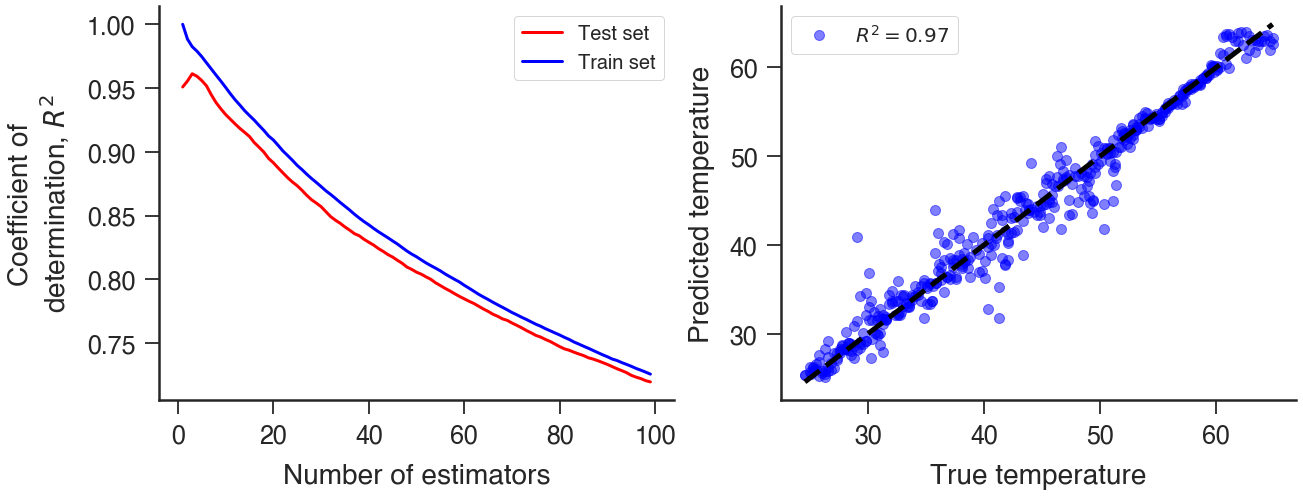



Fitting 5 folds for each of 99 candidates, totalling 495 fits

Characteristics of the best estimator KNeighborsRegressor(n_neighbors=2) 
 
R^2 found in this regression task: 0.9436847262291495


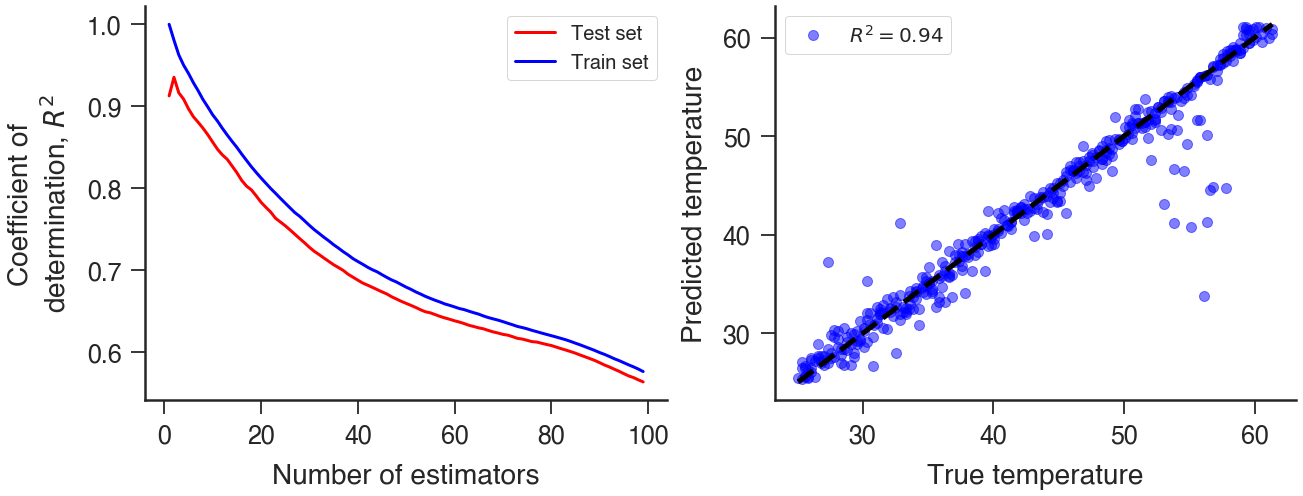



Fitting 5 folds for each of 99 candidates, totalling 495 fits

Characteristics of the best estimator KNeighborsRegressor(n_neighbors=1) 
 
R^2 found in this regression task: 0.9597268523825414


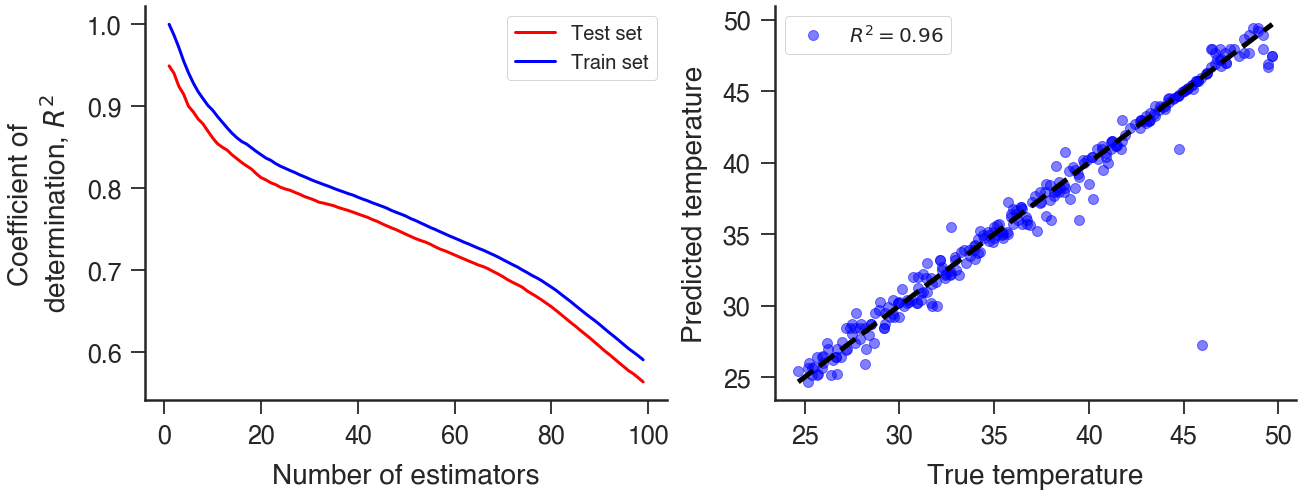

In [44]:
# Regressions shown in Fig. 3(c)
knn_e7_samples_reg_score = []

for i in range(6):
    X = e7_oneclass_nets[i]
    Y = e7_oneclass_temps[i] #regression

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=42)
    
    grid = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors': np.arange(1, 100, 1)}, 
                        scoring='r2', n_jobs=-1, cv=5, verbose=10, 
                        return_train_score=True)

    grid   = grid.fit(X_train, y_train)
    score_ = grid.best_estimator_.score(X_test, y_test)
    knn_e7_samples_reg_score.append(score_)
    
    print('\nCharacteristics of the best estimator', grid.best_estimator_,'\n', '\nR^2 found in this regression task:', score_)

    
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=stdfigsize(nrows=1, ncols=2))

    ax[0].plot(np.arange(1, 100, 1), grid.cv_results_['mean_test_score'], '-', color='red', label='Test set')
    ax[0].plot(np.arange(1, 100, 1), grid.cv_results_['mean_train_score'], '-', color='blue', label='Train set')
    ax[0].set_ylabel("Coefficient of\ndetermination, $R^2$")
    ax[0].set_xlabel("Number of estimators")
    ax[0].legend()

    ax[1].plot(y_test, grid.best_estimator_.predict(X_test), 'o', markersize=10, color='blue', alpha=.5, 
               label="$R^2 = {}$".format(r2_score(y_test, grid.best_estimator_.predict(X_test)).round(decimals=2)))
    ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color="black", linewidth=5)
    ax[1].set_ylabel("Predicted temperature")
    ax[1].set_xlabel("True temperature")
    ax[1].legend()

    f.tight_layout()
    plt.show()
    
    print('\n')

In [45]:
# np.save('statistical-learning-models/knn_e7_samples_reg_score', knn_e7_samples_reg_score)
knn_e7_samples_reg_score = np.load('statistical-learning-models/knn_e7_samples_reg_score.npy')

### Predicting temperature (racemic) - fixed a concentration/class - using edge weights

In [46]:
r811_0_s811_10_fullrange_slicedtemps = np.load('final_pickles/e7_R811_0_S811_10_replicas_temperatures.npy', allow_pickle=True)
r811_0_s811_10_fullrange_sliced      = np.load('final_pickles/e7_R811_0_S811_10_replicas.npy', allow_pickle=True)[0]

r811_1_s811_9_fullrange_slicedtemps = np.load('final_pickles/e7_R811_1_S811_9_replicas_temperatures.npy', allow_pickle=True)
r811_1_s811_9_fullrange_sliced      = np.load('final_pickles/e7_R811_1_S811_9_replicas.npy', allow_pickle=True)[0]

r811_2_s811_8_fullrange_slicedtemps = np.load('final_pickles/e7_R811_2_S811_8_replicas_temperatures.npy', allow_pickle=True)
r811_2_s811_8_fullrange_sliced      = np.load('final_pickles/e7_R811_2_S811_8_replicas.npy', allow_pickle=True)[0]

r811_3_s811_7_fullrange_slicedtemps = np.load('final_pickles/e7_R811_3_S811_7_replicas_temperatures.npy', allow_pickle=True)
r811_3_s811_7_fullrange_sliced      = np.load('final_pickles/e7_R811_3_S811_7_replicas.npy', allow_pickle=True)[0]

r811_4_s811_6_fullrange_slicedtemps = np.load('final_pickles/e7_R811_4_S811_6_replicas_temperatures.npy', allow_pickle=True)
r811_4_s811_6_fullrange_sliced      = np.load('final_pickles/e7_R811_4_S811_6_replicas.npy', allow_pickle=True)[0]

r811_485_s811_515_fullrange_slicedtemps = np.load('final_pickles/e7_R811_4.85_S811_5.15_replicas_temperatures.npy', allow_pickle=True)
r811_485_s811_515_fullrange_sliced      = np.load('final_pickles/e7_R811_4.85_S811_5.15_replicas.npy', allow_pickle=True)[0]


racemic_oneclass_nets = [
                         r811_0_s811_10_fullrange_sliced,
                         r811_1_s811_9_fullrange_sliced,
                         r811_2_s811_8_fullrange_sliced,
                         r811_3_s811_7_fullrange_sliced,
                         r811_4_s811_6_fullrange_sliced,
                         r811_485_s811_515_fullrange_sliced
                        ]

racemic_oneclass_temps = [
                          r811_0_s811_10_fullrange_slicedtemps,                      
                          r811_1_s811_9_fullrange_slicedtemps,
                          r811_2_s811_8_fullrange_slicedtemps,
                          r811_3_s811_7_fullrange_slicedtemps,
                          r811_4_s811_6_fullrange_slicedtemps,
                          r811_485_s811_515_fullrange_slicedtemps
                         ]

In [47]:
#Regressions shown in Fig. 4(d).

# knn_racemic_samples_reg_score = []

# for i in range(6):
#     X = racemic_oneclass_nets[i]
#     Y = racemic_oneclass_temps[i] #regression
    
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=42)

#     grid = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors': np.arange(1, 50, 1)}, 
#                         scoring='r2', n_jobs=-1, cv=5, verbose=10, 
#                         return_train_score=True)


#     grid   = grid.fit(X_train, y_train)
#     score_ = grid.best_estimator_.score(X_test, y_test)
#     knn_racemic_samples_reg_score.append(score_)
#     print('\nCharacteristics of the best estimator', grid.best_estimator_,'\n', '\nR^2 found in this regression task:', score_)

    
#     f, ax = plt.subplots(nrows=1, ncols=2, figsize=stdfigsize(nrows=1, ncols=2))

#     ax[0].plot(grid.cv_results_['mean_test_score'], '-', color='red', label='Test set')
#     ax[0].plot(grid.cv_results_['mean_train_score'], '-', color='blue', label='Train set')
#     ax[0].set_ylabel("Coefficient of\ndetermination, $R^2$")
#     ax[0].set_xlabel("Number of estimators")
#     ax[0].legend()

#     ax[1].plot(grid.best_estimator_.predict(X_test), y_test, 'o', markersize=10, color='blue', alpha=.5, label="$R^2 = {}$".format(r2_score(y_test, grid.best_estimator_.predict(X_test)).round(decimals=2)))
#     ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color="black", linewidth=5)
#     ax[1].set_xlabel("Predicted temperature")
#     ax[1].set_ylabel("True temperature")
#     ax[1].legend()

#     f.tight_layout()
#     plt.show()
    
#     print('\n')

In [48]:
# np.save('statistical-learning-models/knn_racemic_samples_reg_score.npy', knn_racemic_samples_reg_score)
knn_racemic_samples_reg_score = np.load('statistical-learning-models/knn_racemic_samples_reg_score.npy')

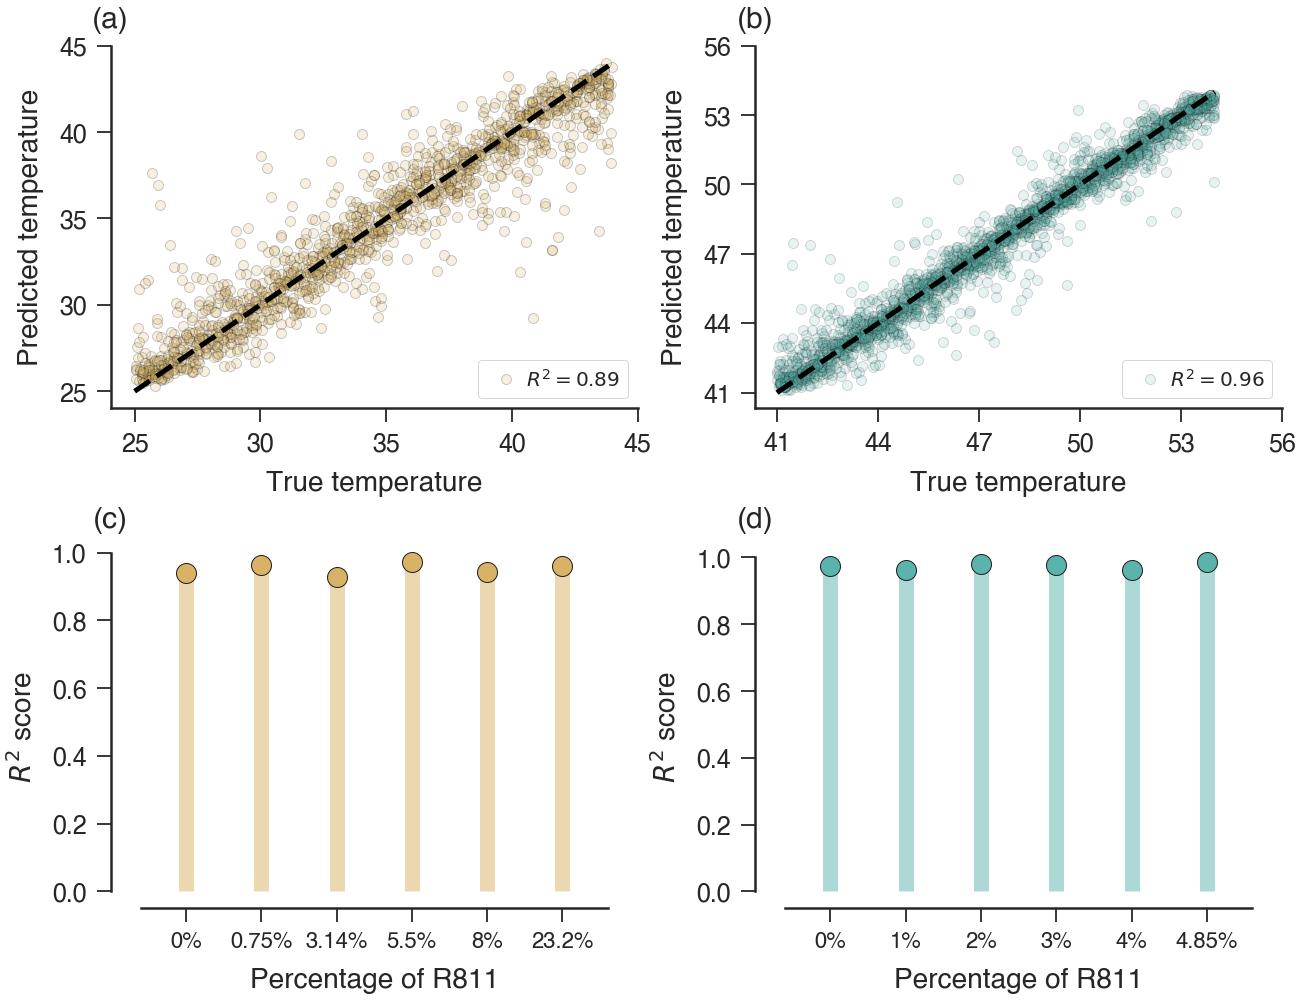

In [49]:
f, ax  = plt.subplots(nrows=2, ncols=2, figsize=stdfigsize(nrows=2, ncols=2, scale=1))
ax     = ax.flatten()

cbarplot_  = [palettable.colorbrewer.diverging.BrBG_3.hex_colors[1],
              palettable.colorbrewer.diverging.BrBG_3.hex_colors[0],
              palettable.colorbrewer.diverging.BrBG_3.hex_colors[-1]
             ]


r2_e7                 = r2_score(reg_y_test, grid_e7reg.best_estimator_.predict(reg_X_test)).round(decimals=2)
reg_ypcaknn_predicted = grid_e7reg.best_estimator_.predict(reg_X_test)

ax[0].plot(reg_y_test, reg_ypcaknn_predicted, 'o', markersize=10, markeredgecolor='black', color=cbarplot_[1], label="$R^2 = {}$".format(r2_e7), alpha=.2)
ax[0].plot([25, 44],[25, 44], '--', color='black', linewidth=5)
ax[0].set_xticks(np.arange(25, 46, 5).astype('int'))
ax[0].set_yticks(np.arange(25, 46, 5).astype('int'))
ax[0].set_ylabel(r'Predicted temperature')
ax[0].set_xlabel(r'True temperature')
ax[0].legend(handletextpad=0, loc='lower right')


r2_racemic            = r2_score(racreg_y_test, grid_knn_racemic.best_estimator_.predict(racreg_X_test)).round(decimals=2) 
reg_ypcaknn_predicted = grid_knn_racemic.best_estimator_.predict(racreg_X_test)

ax[1].plot(racreg_y_test, reg_ypcaknn_predicted, 'o', markersize=10, markeredgecolor='black', color=cbarplot_[2], label="$R^2 = {}$".format(r2_racemic), alpha=.15)
ax[1].plot([41,54], [41,54], '--', color='black', linewidth=5)
ax[1].set_xticks(np.arange(41,57,3).astype('int'))
ax[1].set_yticks(np.arange(41,57,3).astype('int'))
ax[1].set_ylabel(r'Predicted temperature')
ax[1].set_xlabel(r'True temperature')
ax[1].legend(handletextpad=0, loc='lower right')


ax[2].vlines(np.linspace(.25,.75, num=6),
             ymin=0,
             ymax=np.asarray(knn_e7_samples_reg_score),
             color=cbarplot_[1],
             linewidth=15,
             alpha=.5)

ax[2].plot(np.linspace(.25,.75, num=6),
           np.asarray(knn_e7_samples_reg_score),
           'o',
           markersize=20,
           color=cbarplot_[1],
           markeredgecolor='#202020',
           alpha=1)


ax[2].set_ylabel("$R^2$ score")
ax[2].set_xlabel("Percentage of R811")
ax[2].set_xticks(np.linspace(.25,.75, num=6))
ax[2].spines['bottom'].set_bounds(0.19, 0.81)
ax[2].set_xticklabels(["0%", "0.75%", "3.14%", "5.5%", "8%", "23.2%"], size=22)
ax[2].spines['left'].set_bounds(0, 1)
ax[2].set_xlim(0.15, .85)


ax[3].vlines(np.linspace(.25,.75, num=6),
             ymin=0,
             ymax=knn_racemic_samples_reg_score,
             color=cbarplot_[2],
             linewidth=15,
             alpha=.5)

ax[3].plot(np.linspace(.25,.75, num=6),
           knn_racemic_samples_reg_score,
           'o',
           markersize=20,
           color=cbarplot_[2],
           markeredgecolor='#202020',
           alpha=1)

ax[3].set_ylabel("$R^2$ score")
ax[3].set_xlabel("Percentage of R811")
ax[3].set_xticks(np.linspace(.25,.75, num=6))
ax[3].set_xticklabels(["0%", "1%", "2%", "3%", "4%", "4.85%"], size=22)
ax[3].spines['bottom'].set_bounds(0.19, 0.81)
ax[3].spines['left'].set_bounds(0, 1)
ax[3].set_xlim(0.15, .85)


for i_, ax_, xcoord_ in zip(range(len(ax)), ax, [0]*2+[0]*2):
    if i_<2:
        ax_.annotate('(' + string.ascii_lowercase[i_] + ')', (xcoord_, 1.05), xycoords='axes fraction', ha='center', fontsize=30)
    else:    
        ax_.annotate('(' + string.ascii_lowercase[i_] + ')', (xcoord_, 1.05), xycoords='axes fraction', ha='center', fontsize=30)
    
f.tight_layout()
f.savefig('final_figures/fig4/fig4.png', bbox_inches='tight', dpi=300)